<a href="https://colab.research.google.com/github/Laser57/A01273286_A4.2/blob/main/Avance5_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="center">
<img src="https://i0.wp.com/gershenson.mx/wp-content/uploads/2020/08/logo-tec-de-monterrey-e1484853084274.png?ssl=1" alt="Imagen opcional" width="200"/>
</p>
<style>
h1 {
  text-align: center;
  font-size: 3em;
  color: #4CAF50;
}

h2 {
  text-align: center;
  font-size: 2em;
  color: #FF9800;
  font-style: italic;
}

h3 {
  text-align: center;
  font-size: 1.5em;
  color: #2196F3;
}

ul {
  list-style-type: none;
  text-align: center;
  padding: 0;
}

ul li {
  font-size: 1.2em;
  margin: 10px 0;
}

hr {
  border: 0;
  height: 3px;
  background: #333;
  background-image: linear-gradient(to right, #4CAF50, #2196F3, #FF9800);
}
</style>

# **Proyecto Integrador**


---

## **Trastorno Bipolar**

---

### **Integrantes del Equipo:**

<ul>
  <li>Carlos Daniel Mendoza Paz - A01793027</li>
  <li>Guillermo Alfonso Muñiz Hermosillo - A01793101 </li>
  <li>Luis Alfonso Sabanero Esquivel - A01273286</li>
</ul>

---

### **Grettel Barceló Alonso**

### **Proyecto Integrador**

### **16 Junio de 2024**

---






---
# **INICIO**


---





# PROCESAMIENTO DATOS DE LOS FAMILIARES POR FAMILY ID


Creemos que para contar con un modelo más eficiente y de mayor complejidad y fiabilidad es necesario agrupar los datos actuales de acuerdo con grupos familiares.

Es por eso por lo que se agruparan las familias en un data frame utilizando el Family_ID y las relaciones familiares como métodos de agrupación.


# Importación de los datos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

db_Bipolar = 'final_dataframe.xlsx'


final_df = pd.read_excel(db_Bipolar)


# Estadistica de datos

In [ ]:
# Descripcion general de los datos
print("Descripción general de la forma y los tipos de datos:")
print(final_df.info())

Descripción general de la forma y los tipos de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 56 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Family_ID                                72 non-null     int64 
 1   Age_Proband                              72 non-null     int64 
 2   Gender_Proband                           72 non-null     object
 3   Marital_Status_Proband                   72 non-null     object
 4   School_Years_Proband                     72 non-null     object
 5   Religion_Proband                         72 non-null     object
 6   Employment_Proband                       72 non-null     object
 7   Bipolar_DIGS_Proband                     72 non-null     bool  
 8   Proband_Relation_Familiar1               72 non-null     object
 9   Age_y_Familiar1                          72 non-null     int64 
 10  Gender_y_F

In [ ]:
# Aplicamos estadistica descriptiva solo a las variables numéricas
final_df.describe(include=[np.number])

,Family_ID,Age_Proband,Age_y_Familiar1,Age_y_Familiar2
count,72.000000,72.000000,72.000000,72.000000
mean,137.000000,39.972222,51.861111,45.972222
std,25.584436,14.067215,14.574051,15.917014
min,100.000000,15.000000,20.000000,23.000000
25%,116.000000,28.750000,44.000000,31.500000
50%,129.000000,38.500000,50.000000,45.000000
75%,155.250000,47.250000,63.500000,56.000000
max,187.000000,78.000000,83.000000,87.000000


In [ ]:
# Aplicamos estadistica descriptiva solo a las variables categoricas

final_df.describe(include=[object, bool]).T


,count,unique,top,freq
Gender_Proband,72,2,Female,37
Marital_Status_Proband,72,5,Married,33
School_Years_Proband,72,6,College,26
Religion_Proband,72,3,Catholic,56
Employment_Proband,72,2,Yes,45
Bipolar_DIGS_Proband,72,2,True,53
Proband_Relation_Familiar1,72,7,Mother,33
Gender_y_Familiar1,72,2,Female,50
Marital_Status_y_Familiar1,72,5,Married,45
School_Years_y_Familiar1,72,5,College,26


# Análisis univariante
Se emplean técnicas de visualización (histogramas, boxplot, gráficos de barras) en función del tipo de datos y la escala de medición.


### Frecuencia de las clases en variables categóricas

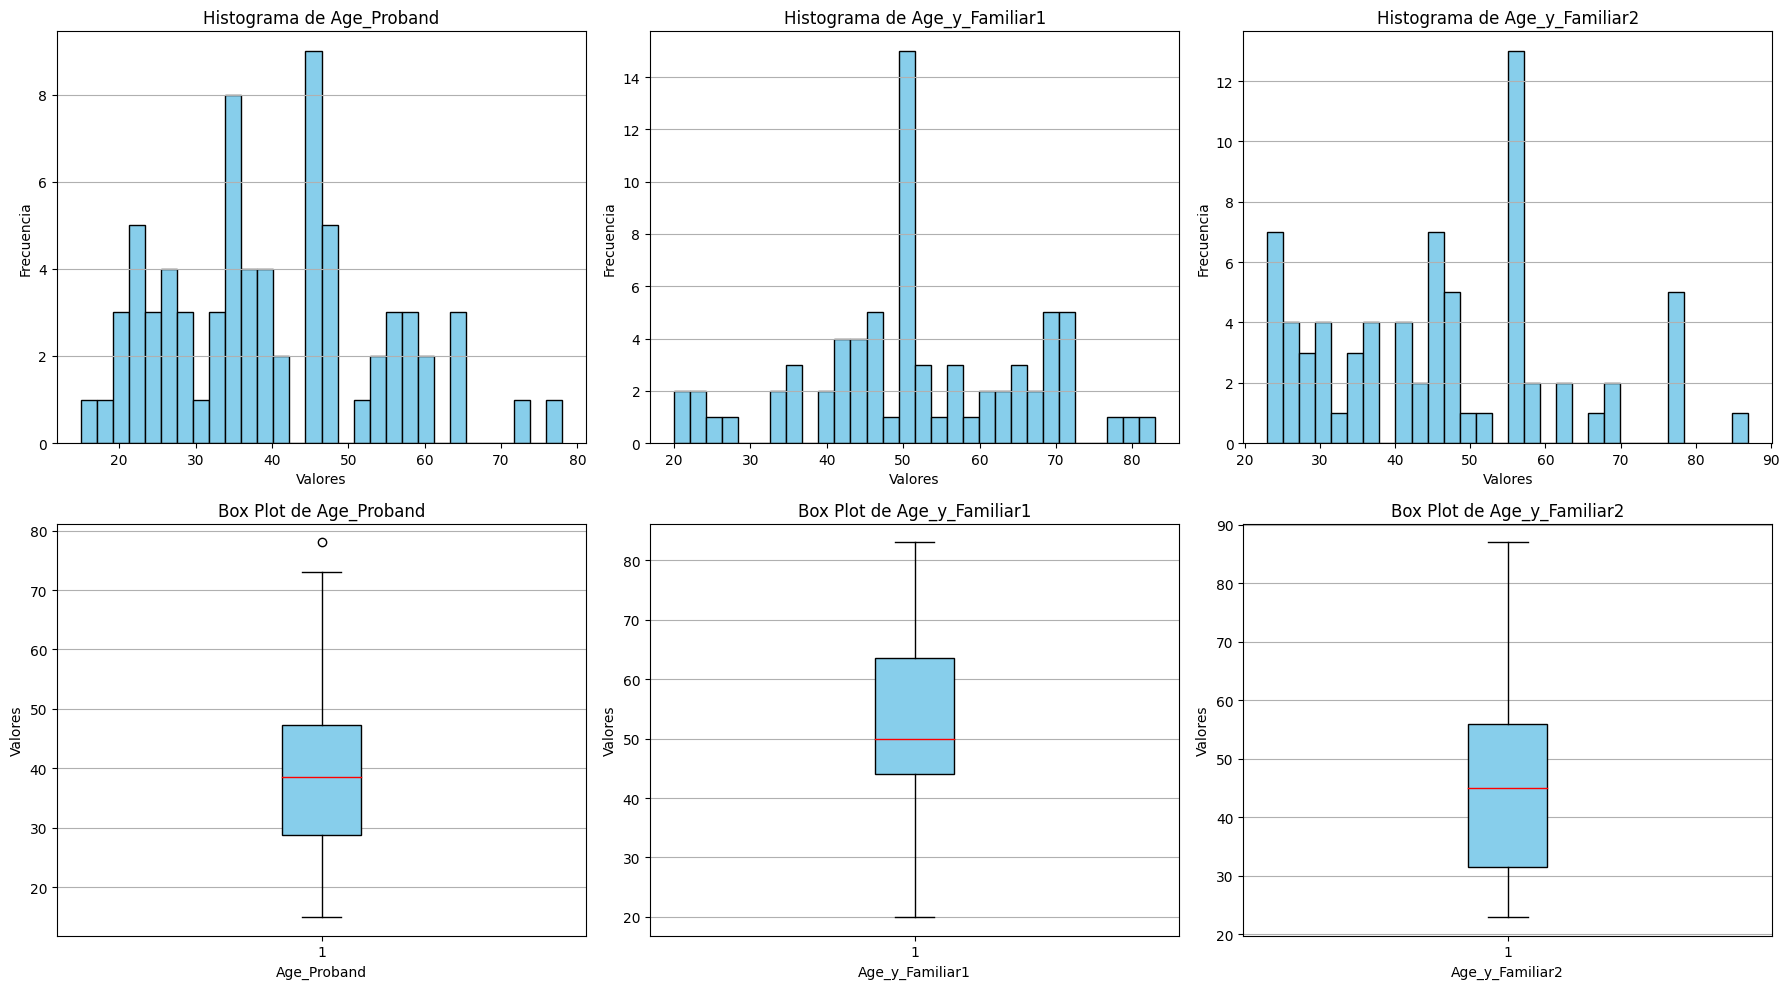

In [ ]:
# Definimos las columnas numéricas
columnas_numericas = final_df.select_dtypes(include='int64').columns
columnas_numericas = columnas_numericas.drop('Family_ID')

# Configuración de la figura
num_columnas = len(columnas_numericas)
fig, axs = plt.subplots(2, num_columnas, figsize=(num_columnas * 6, 10))

# Iteramos sobre las columnas numéricas seleccionadas y generamos cada gráfico
for i, nombre_columna in enumerate(columnas_numericas):
    # Histograma
    axs[0, i].hist(final_df[nombre_columna], bins=30, color='skyblue', edgecolor='black')
    axs[0, i].set_title(f"Histograma de {nombre_columna}")
    axs[0, i].set_xlabel("Valores")
    axs[0, i].set_ylabel("Frecuencia")
    axs[0, i].grid(axis='y')

    # Box plot
    axs[1, i].boxplot(final_df[nombre_columna], patch_artist=True, boxprops=dict(facecolor='skyblue', color='black'), medianprops=dict(color='red'))
    axs[1, i].set_title(f"Box Plot de {nombre_columna}")
    axs[1, i].set_xlabel(nombre_columna)
    axs[1, i].set_ylabel("Valores")
    axs[1, i].grid(axis='y')

# Ajustamos el diseño para evitar superposiciones
plt.tight_layout()

# Mostramos los gráficos
plt.show()

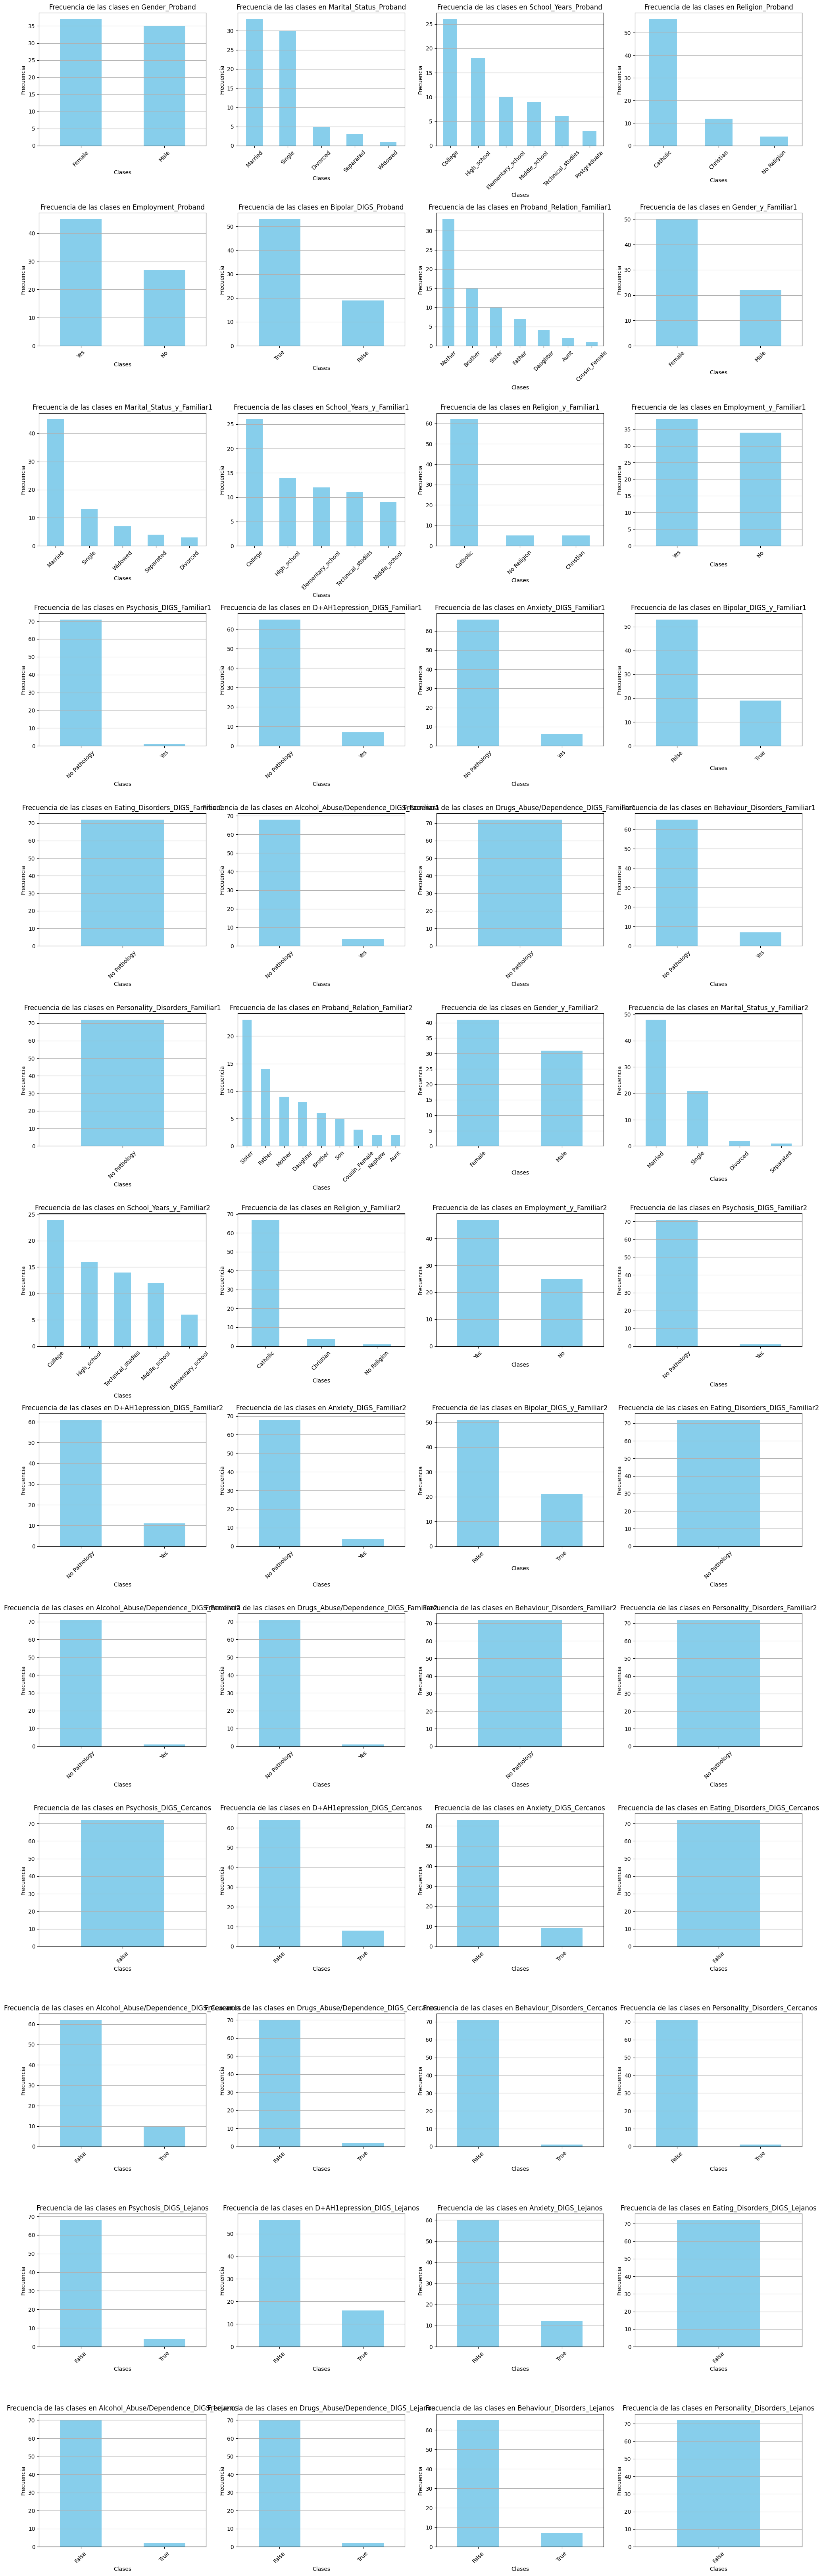

In [ ]:
# Calculamos la frecuencia de cada una de las clases excepto la clase de salida


# Obtener todas las columnas categóricas excepto 'Psychiatric_Diagnosis_DIGS'
columnas_categoricas = final_df.select_dtypes(include=['object', 'bool']).columns
columnas_graficas = [columna for columna in columnas_categoricas if columna != 'Psychiatric_Diagnosis_DIGS']

# Configuración de la figura
num_subplots = len(columnas_graficas)
num_cols = 4
num_rows = (num_subplots + num_cols - 1) // num_cols
fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))

# Iteramos sobre las columnas seleccionadas y generamos cada gráfico
for i, nombre_columna in enumerate(columnas_graficas):
    # Calculamos la frecuencia de las clases
    frecuencia_clases = final_df[nombre_columna].value_counts()

    # Calculamos la posición del subplot
    fila = i // num_cols
    columna = i % num_cols

    # Creamos el gráfico de barras en el subplot correspondiente
    frecuencia_clases.plot(kind='bar', color='skyblue', ax=axs[fila, columna])
    axs[fila, columna].set_title(f"Frecuencia de las clases en {nombre_columna}")  # Utilizamos el nombre de la columna
    axs[fila, columna].set_xlabel("Clases")
    axs[fila, columna].set_ylabel("Frecuencia")
    axs[fila, columna].tick_params(axis='x', rotation=45)
    axs[fila, columna].grid(axis='y')

# Ajustamos el diseño para evitar superposiciones
plt.tight_layout()

# Mostramos los gráficos
plt.show()

# Análisis bi/multivariante

Se efectúan análisis de correlación (cuantitativos y gráficos) para explorar las relaciones entre las variables importantes del conjunto de datos.

Debido a que nuestras features consisten principalmente en variables categóricas con etiquetas podemos usar técnicas de análisis de asociación diseñadas para este tipo de variables.

Así mismo podemos reducir la dimensionalidad de nuestras features mediante el uso de técnicas como el Análisis de Componentes Principales (PCA) para obtener las combinaciones lineales que capturen la mayor parte de la variabilidad de los datos


In [ ]:
# Hacemos una copia de los datos sin valores faltantes o nulos
multi_df = final_df.copy()
multi_df.head()

,Family_ID,Age_Proband,Gender_Proband,Marital_Status_Proband,School_Years_Proband,Religion_Proband,Employment_Proband,Bipolar_DIGS_Proband,Proband_Relation_Familiar1,Age_y_Familiar1,...,Behaviour_Disorders_Cercanos,Personality_Disorders_Cercanos,Psychosis_DIGS_Lejanos,D+AH1epression_DIGS_Lejanos,Anxiety_DIGS_Lejanos,Eating_Disorders_DIGS_Lejanos,Alcohol_Abuse/Dependence_DIGS_Lejanos,Drugs_Abuse/Dependence_DIGS_Lejanos,Behaviour_Disorders_Lejanos,Personality_Disorders_Lejanos
0,159,54,Male,Married,College,Catholic,No,True,Mother,58,...,False,False,False,False,True,False,False,False,False,False
1,143,39,Male,Separated,College,Catholic,No,True,Sister,70,...,False,False,False,False,False,False,False,False,False,False
2,143,73,Male,Married,Elementary_school,Catholic,No,True,Sister,70,...,False,False,False,False,False,False,False,False,False,False
3,144,21,Male,Single,Elementary_school,Catholic,Yes,True,Mother,41,...,True,False,False,False,False,False,False,False,False,False
4,126,33,Female,Married,Middle_school,Catholic,No,True,Mother,50,...,False,False,False,True,True,False,False,False,True,False


In [ ]:
# Creamos un metodo que realice un boxplot que nos muestre la distribucion de los pacientes
# con Bipolaridad respecto a otro campo.

def get_bipolar_boxplot_by(campo, custom_palette):
  plt.figure(figsize=(8, 6))

  sns.boxplot(x='Bipolar_DIGS_Proband', y='Age_Proband', data=multi_df, hue='Bipolar_DIGS_Proband', palette=custom_palette)
  # Mostramos el rango de valores del campo elegido como líneas verticales y valores numéricos
  for i, cat in enumerate(multi_df['Bipolar_DIGS_Proband'].unique()):
    subset = multi_df[multi_df['Bipolar_DIGS_Proband'] == cat]
    min_field = subset[campo].min()
    max_field = subset[campo].max()
    plt.axhline(min_field, color=custom_palette[cat], linestyle='--', linewidth=1)
    plt.axhline(max_field, color=custom_palette[cat], linestyle='--', linewidth=1)
    plt.text(i, min_field, f'{min_field}', ha='right', va='center', color=custom_palette[cat], fontsize=10)
    plt.text(i, max_field, f'{max_field}', ha='right', va='center', color=custom_palette[cat], fontsize=10)

  # Agregar etiquetas y título
  plt.xlabel('Bipolaridad')
  plt.ylabel(campo)
  plt.title(f'Distribución de {campo} con respecto de Bipolaridad')

  # Mostrar el boxplot
  plt.legend(loc='upper right')
  plt.show()

## Distribucion de Bipolaridad por Edad

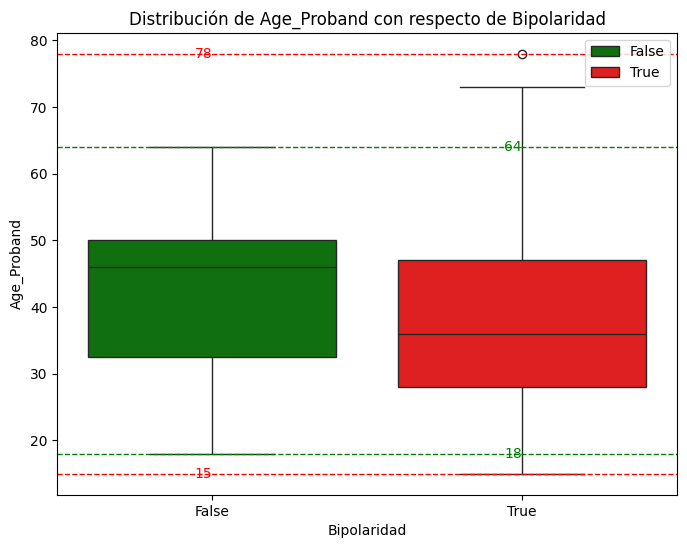

In [ ]:
custom_palette = {True: "red", False: "green"}

get_bipolar_boxplot_by("Age_Proband", custom_palette)

El promedio de los pacientes diagnosticados se encuentra en edades que van desde los 20's tardíos hasta los 40's tardíos. Así mismo, encontramos un outlier de 78 años diagnosticado con bipolaridad.

## Bipolaridad por Genero

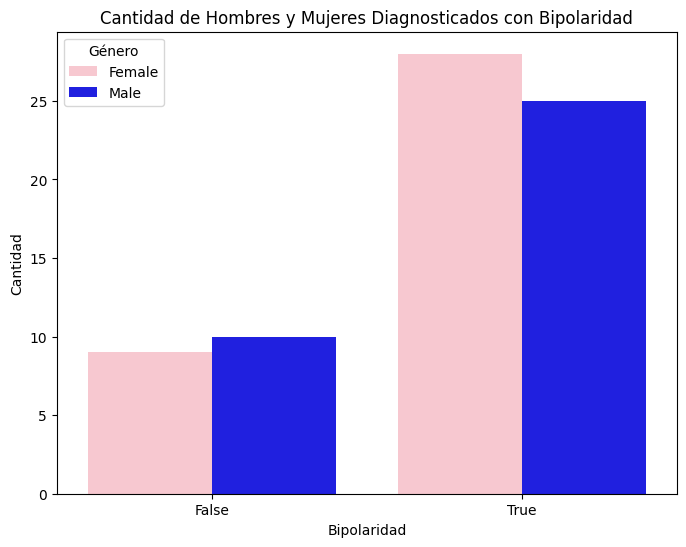

In [ ]:
plt.figure(figsize=(8, 6))

# Contar el número de hombres y mujeres diagnosticados con bipolaridad
gender_counts = multi_df.groupby(['Bipolar_DIGS_Proband', 'Gender_Proband']).size().reset_index(name='Count')

# Crear el gráfico de barras
sns.barplot(x='Bipolar_DIGS_Proband', y='Count', hue='Gender_Proband', data=gender_counts, palette={'Male': 'blue', 'Female': 'pink'})

# Agregar etiquetas y título
plt.xlabel('Bipolaridad')
plt.ylabel('Cantidad')
plt.title('Cantidad de Hombres y Mujeres Diagnosticados con Bipolaridad')

# Mostrar el gráfico de barras
plt.legend(title='Género')
plt.show()



In [ ]:
gender_counts

,Bipolar_DIGS_Proband,Gender_Proband,Count
0,False,Female,9
1,False,Male,10
2,True,Female,28
3,True,Male,25


In [ ]:
# Definimos las columnas categoricas
columnas_nominales = multi_df.select_dtypes(exclude=np.number).columns.tolist()
columnas_nominales.remove("Bipolar_DIGS_Proband") # Variable de salida
# Filtrar las columnas ordinales
columnas_ordinales = [col for col in columnas_nominales if "School_Years_" in col]

# Remover las columnas ordinales de las columnas nominales
columnas_nominales = [col for col in columnas_nominales if "School_Years_" not in col]

In [ ]:
print("----- Columnas Nominales -----")
print(columnas_nominales)

print("----- Columnas Ordinales -----")
print(columnas_ordinales)

----- Columnas Nominales -----
['Gender_Proband', 'Marital_Status_Proband', 'Religion_Proband', 'Employment_Proband', 'Proband_Relation_Familiar1', 'Gender_y_Familiar1', 'Marital_Status_y_Familiar1', 'Religion_y_Familiar1', 'Employment_y_Familiar1', 'Psychosis_DIGS_Familiar1', 'D+AH1epression_DIGS_Familiar1', 'Anxiety_DIGS_Familiar1', 'Bipolar_DIGS_y_Familiar1', 'Eating_Disorders_DIGS_Familiar1', 'Alcohol_Abuse/Dependence_DIGS_Familiar1', 'Drugs_Abuse/Dependence_DIGS_Familiar1', 'Behaviour_Disorders_Familiar1', 'Personality_Disorders_Familiar1', 'Proband_Relation_Familiar2', 'Gender_y_Familiar2', 'Marital_Status_y_Familiar2', 'Religion_y_Familiar2', 'Employment_y_Familiar2', 'Psychosis_DIGS_Familiar2', 'D+AH1epression_DIGS_Familiar2', 'Anxiety_DIGS_Familiar2', 'Bipolar_DIGS_y_Familiar2', 'Eating_Disorders_DIGS_Familiar2', 'Alcohol_Abuse/Dependence_DIGS_Familiar2', 'Drugs_Abuse/Dependence_DIGS_Familiar2', 'Behaviour_Disorders_Familiar2', 'Personality_Disorders_Familiar2', 'Psychosis_DIG

# Matriz de correlación

En esta sección se determina la correlación entre las variables de la base de datos por medio del cálculo de la chi cuadrada.

In [ ]:
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

df_chi = multi_df.copy()
categorical_cols = df_chi.select_dtypes(include=['object','bool','int64']).columns.to_list()

p_values = pd.DataFrame(index=categorical_cols, columns=categorical_cols)

for col1 in categorical_cols:
    for col2 in categorical_cols:
        if col1 == col2:
            p_values.loc[col1, col2] = np.nan
        else:
            contingency_table = pd.crosstab(df_chi[col1], df_chi[col2])  # Aquí se cambia de df a df_encoded
            chi2, p, dof, expected = chi2_contingency(contingency_table)
            p_values.loc[col1, col2] = p

p_values = p_values.astype(float)



In [ ]:
for nombre,i in p_values['Bipolar_DIGS_Proband'].items():
    if i < 0.05:
        print(f"{nombre}:  Hay una asociación significativa entre las variables: {i}")


Bipolar_DIGS_y_Familiar1:  Cumple con la correlación entre variable: 0.0344298944221658
Proband_Relation_Familiar2:  Cumple con la correlación entre variable: 0.02880886043454527
D+AH1epression_DIGS_Lejanos:  Cumple con la correlación entre variable: 0.03501465777574637


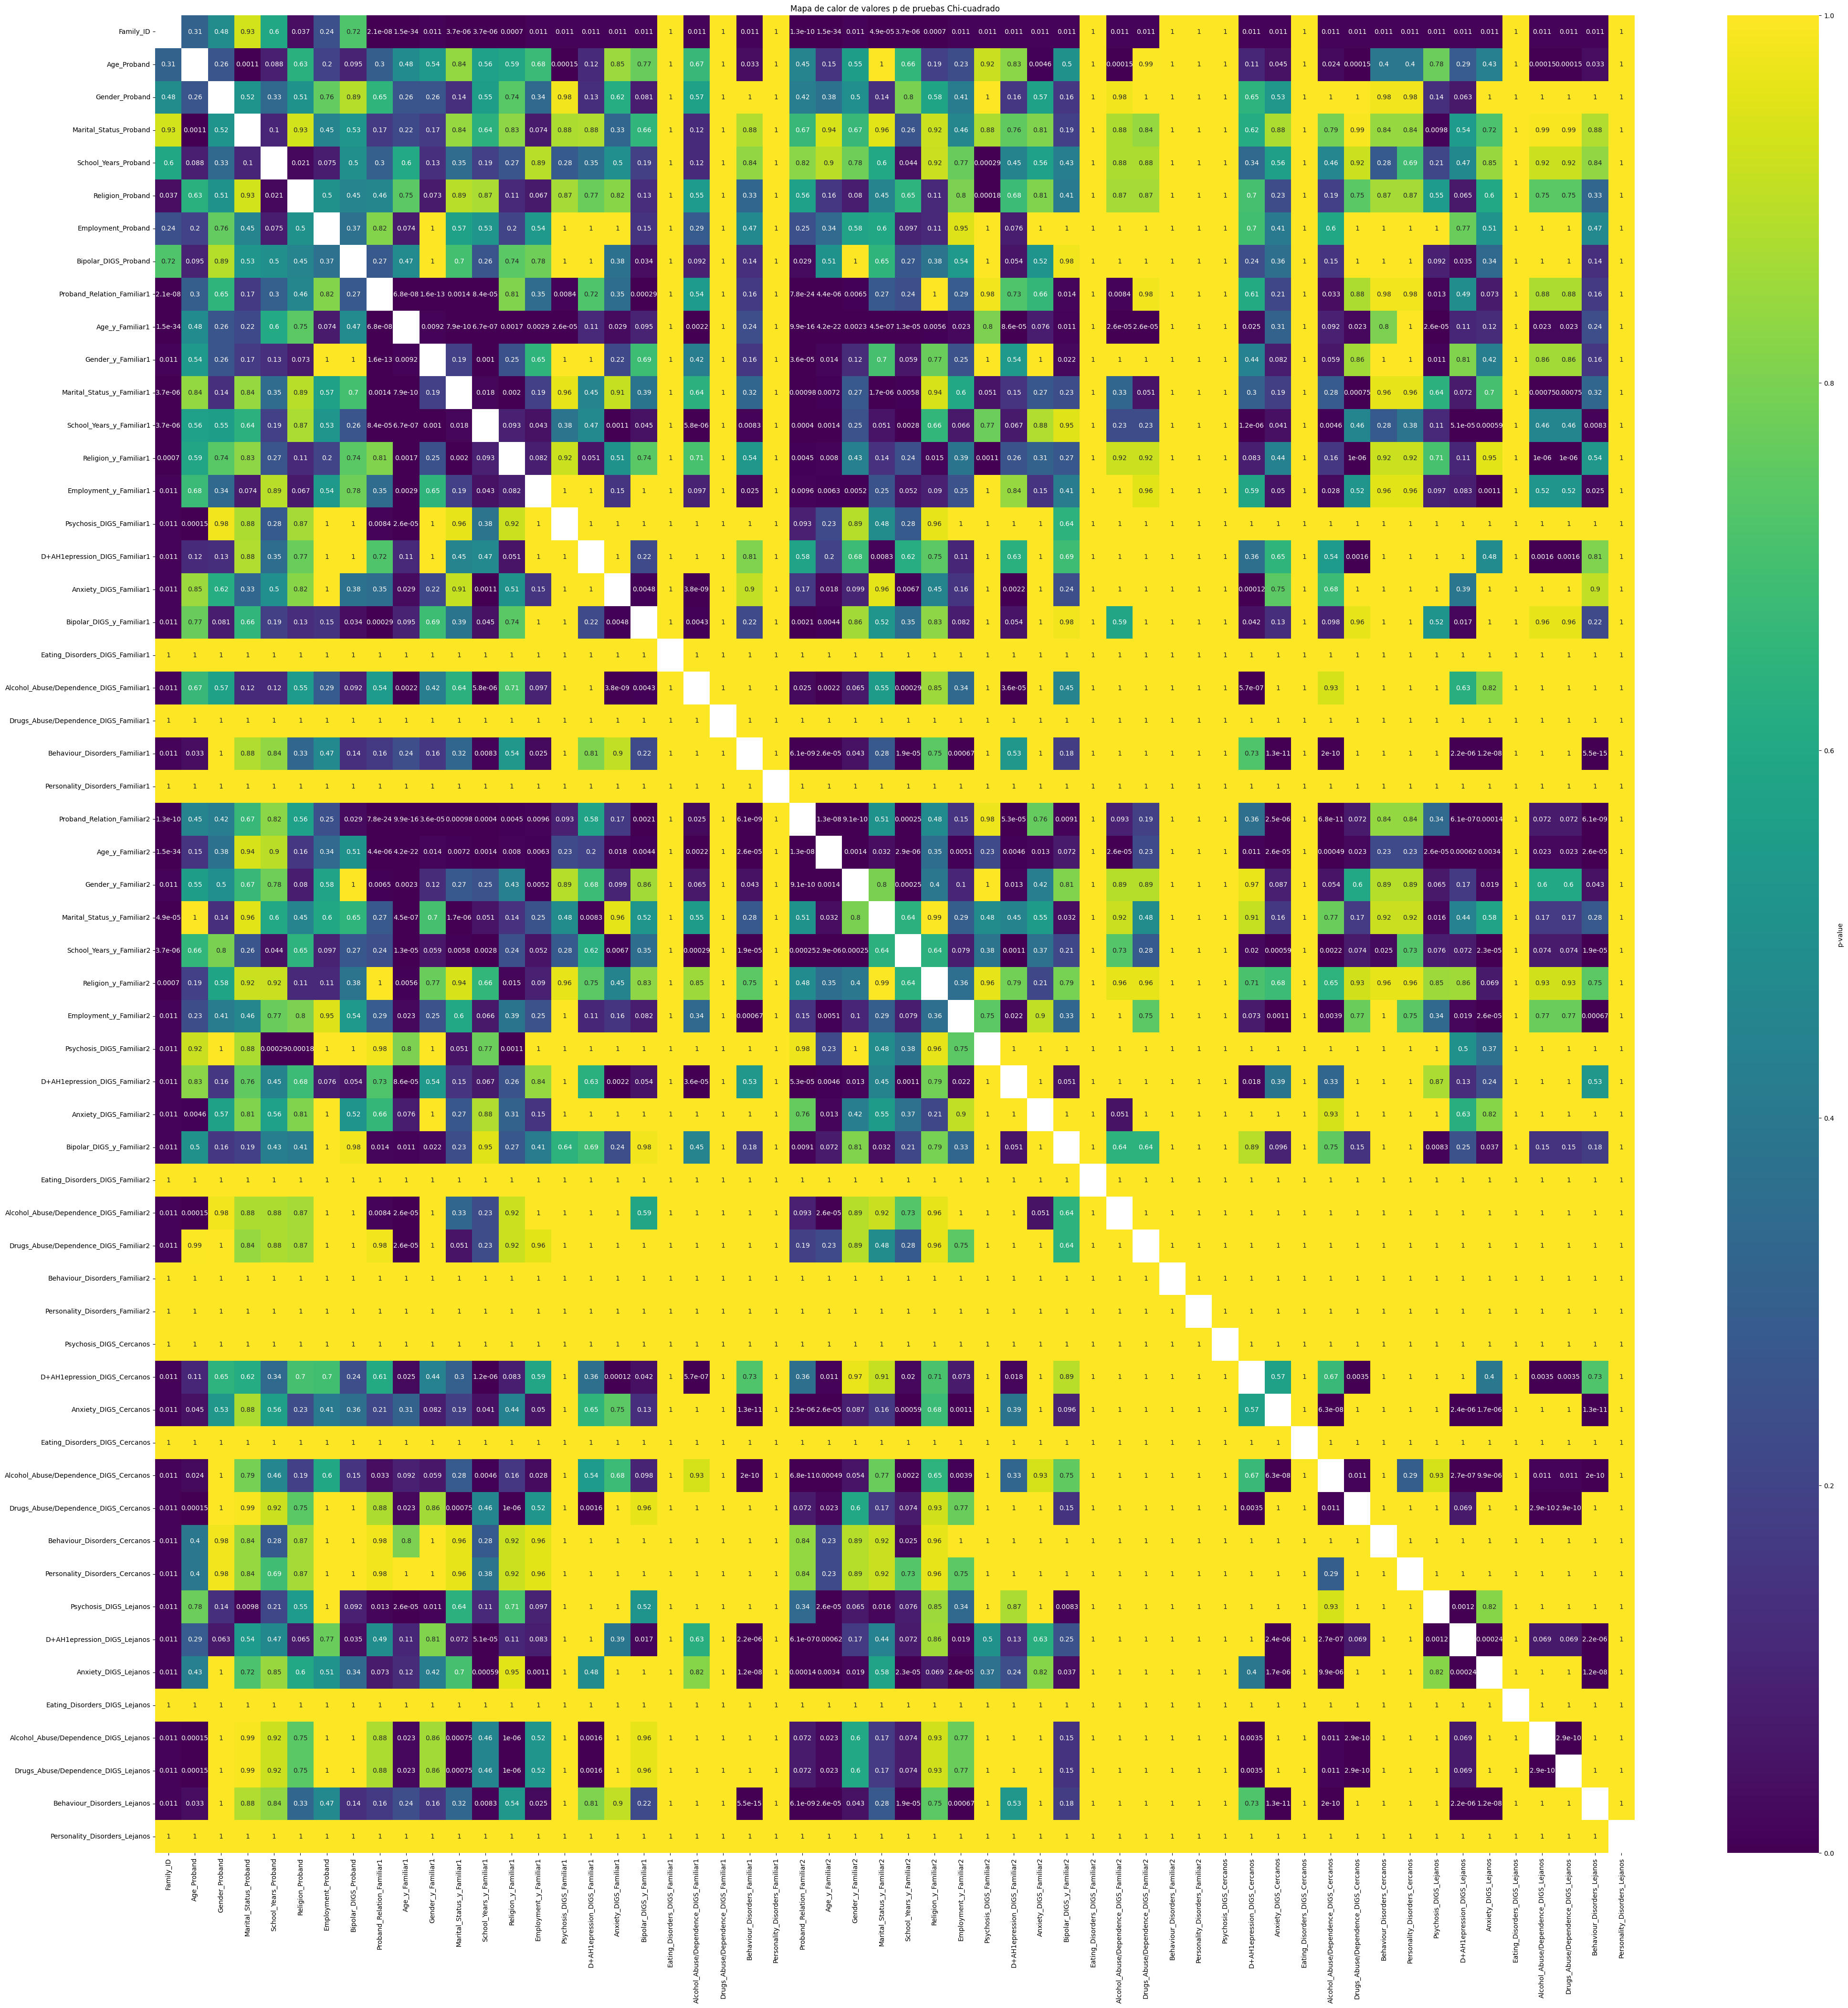

In [ ]:
# Visualizar los resultados en un mapa de calor
plt.figure(figsize=(50, 50))
sns.heatmap(p_values, annot=True, cmap='viridis', cbar_kws={'label': 'p-value'})
plt.title('Mapa de calor de valores p de pruebas Chi-cuadrado')
plt.show()

# Ordinal Encoding

Para las columnas School Years es necesario aplicar una codificacion usando el ordinal encoder ya que estas variables tienen un orden especifico de acuerdo al nivel de escolaridad.

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Crear el OrdinalEncoder con las categorías para cada columna
categorias = [["Elementary_school", "Middle_school", "Technical_studies", "High_school", "College", "Postgraduate"]] * len(columnas_ordinales)
# Crear el OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories=categorias)

# Aplicar el OrdinalEncoder a las columnas ordinales
ordinales_transformadas = ordinal_encoder.fit_transform(multi_df[columnas_ordinales])

# Convertir las columnas transformadas a enteros
ordinales_transformadas = ordinales_transformadas.astype(int)

# Reemplazar las columnas originales en el DataFrame con las columnas transformadas
multi_df[columnas_ordinales] = ordinales_transformadas

# One Hot Encoding



Para trabajar con los métodos mencionados es necesario convertir nuestras variables categóricas en representaciones numéricas antes de calcular las correlaciones.

Usaremos la técnica de One Hot Encoding

**One Hot Encoding:**

El One-Hot Encoding es utilizado para manejar variables categóricas o de tipo nominal en un formato numérico, convierte variables categóricas en un formato numérico donde cada categoría se representa como una columna binaria (0 o 1), facilitando su uso en algoritmos de aprendizaje automático.

En resumen, creamos una columna con valores binarios (0 o 1) para cada categoría. Esto es útil cuando no hay un orden implícito en las categorías. Por lo que utilizaremos las variables nominales



In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Crear one-hot encoding para las variables categóricas
one_hot_df = multi_df.copy()
# Quitar las columnas nominales de one_hot_df
one_hot_df.drop(columns=columnas_nominales, inplace=True)

# Inicializar el codificador OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')
# Ajustar y transformar las columnas nominales usando ordered_df
nominales_encoded = one_hot_encoder.fit_transform(multi_df[columnas_nominales])
# Obtener los nombres de las nuevas columnas generadas por el codificador
nuevas_columnas = one_hot_encoder.get_feature_names_out(columnas_nominales)

# Convertir los valores codificados a enteros
nominales_encoded_int = nominales_encoded.astype(int)

print(nominales_encoded_int.shape, len(nuevas_columnas))
# Crear un nuevo DataFrame con las columnas codificadas
one_hot_encoded_df = pd.DataFrame(nominales_encoded_int, columns=nuevas_columnas)
one_hot_encoded_df = one_hot_encoded_df.astype(int)

# Resetear los índices para asegurar una alineación adecuada antes de hacer merge
one_hot_df.reset_index(drop=True, inplace=True)
one_hot_encoded_df.reset_index(drop=True, inplace=True)

# Concatenar el DataFrame codificado con las columnas del DataFrame original que no son nominales

one_hot_df = pd.merge(one_hot_df, one_hot_encoded_df, left_index=True, right_index=True, how='inner')
one_hot_df.head()

(72, 61) 61


,Family_ID,Age_Proband,School_Years_Proband,Bipolar_DIGS_Proband,Age_y_Familiar1,School_Years_y_Familiar1,Age_y_Familiar2,School_Years_y_Familiar2,Gender_Proband_Male,Marital_Status_Proband_Married,...,Alcohol_Abuse/Dependence_DIGS_Cercanos_True,Drugs_Abuse/Dependence_DIGS_Cercanos_True,Behaviour_Disorders_Cercanos_True,Personality_Disorders_Cercanos_True,Psychosis_DIGS_Lejanos_True,D+AH1epression_DIGS_Lejanos_True,Anxiety_DIGS_Lejanos_True,Alcohol_Abuse/Dependence_DIGS_Lejanos_True,Drugs_Abuse/Dependence_DIGS_Lejanos_True,Behaviour_Disorders_Lejanos_True
0,159,54,4,True,58,3,48,3,1,1,...,0,0,0,0,0,0,1,0,0,0
1,143,39,4,True,70,2,34,4,1,0,...,0,0,0,0,0,0,0,0,0,0
2,143,73,0,True,70,2,34,4,1,1,...,0,0,0,0,0,0,0,0,0,0
3,144,21,0,True,41,0,59,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,126,33,1,True,50,4,55,3,0,1,...,1,0,0,0,0,1,1,0,0,1


In [ ]:
# Imprimimos la forma resultante y validamos que existe algun valor nulo
print(one_hot_df.shape)
one_hot_df[one_hot_df.isnull().any(axis=1)]

(72, 69)


,Family_ID,Age_Proband,School_Years_Proband,Bipolar_DIGS_Proband,Age_y_Familiar1,School_Years_y_Familiar1,Age_y_Familiar2,School_Years_y_Familiar2,Gender_Proband_Male,Marital_Status_Proband_Married,...,Alcohol_Abuse/Dependence_DIGS_Cercanos_True,Drugs_Abuse/Dependence_DIGS_Cercanos_True,Behaviour_Disorders_Cercanos_True,Personality_Disorders_Cercanos_True,Psychosis_DIGS_Lejanos_True,D+AH1epression_DIGS_Lejanos_True,Anxiety_DIGS_Lejanos_True,Alcohol_Abuse/Dependence_DIGS_Lejanos_True,Drugs_Abuse/Dependence_DIGS_Lejanos_True,Behaviour_Disorders_Lejanos_True


# Normalización

En nuestro análisis del conjunto de datos, creemos que no es necesario aplicar técnicas de normalización a las variables.

Esto se debe a que la mayoría de nuestras características son de naturaleza categórica, lo que significa que representan categorías discretas en lugar de valores numéricos continuos. Las variables categóricas, como el género, la religión, el estado civil y otras, no requieren normalización, ya que la comparación de sus valores se basa en la igualdad o diferencia entre categorías, en lugar de en la magnitud de los valores numéricos.

La única excepción es la variable de edad, que es numérica y podría necesitar ser escalada o normalizada si fuera relevante para nuestro análisis. Sin embargo en esta ocasión, no lo creemos necesario.


# Escalamiento

Realizar un escalamiento a las variables numéricas, en especial en nuestro conjunto de datos, las variables de edad es relevante debido a las diferencias en las escalas de medida entre estas variables y las otras características  categoricas del conjunto de datos las cuales solo cunentan con valores 0 y 1.

En muchos modelos de aprendizaje automático, las diferencias en las escalas de las variables pueden afectar significativamente el rendimiento del modelo. En el caso específico de las edades, aunque sean valores numéricos, su escala es bastante diferente de las demas características del conjunto de datos. Esto puede conducir a que el modelo otorgue un peso desproporcionado a las características con escalas más grandes, es decir las edades de los pacientes, lo que podría sesgar los resultados del modelo.

Por lo tanto, escalar las variables de edad ayudara a nivelar las diferencias de escala, permitiendo que el modelo aprenda de manera más equilibrada y mejorando así su capacidad predictiva y su capacidad para capturar patrones relevantes en los datos.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Creamos una copia del DataFrame para evitar modificar el original
df_escalonado = one_hot_df.copy()

# Inicializamos el objeto MinMaxScaler
scaler = MinMaxScaler()

# Escalamos las columnas numéricas seleccionadas
df_escalonado[columnas_numericas] = scaler.fit_transform(df_escalonado[columnas_numericas])

In [ ]:
# Mostramos las primeras filas del DataFrame escalonado
df_escalonado.head()

,Family_ID,Age_Proband,School_Years_Proband,Bipolar_DIGS_Proband,Age_y_Familiar1,School_Years_y_Familiar1,Age_y_Familiar2,School_Years_y_Familiar2,Gender_Proband_Male,Marital_Status_Proband_Married,...,Alcohol_Abuse/Dependence_DIGS_Cercanos_True,Drugs_Abuse/Dependence_DIGS_Cercanos_True,Behaviour_Disorders_Cercanos_True,Personality_Disorders_Cercanos_True,Psychosis_DIGS_Lejanos_True,D+AH1epression_DIGS_Lejanos_True,Anxiety_DIGS_Lejanos_True,Alcohol_Abuse/Dependence_DIGS_Lejanos_True,Drugs_Abuse/Dependence_DIGS_Lejanos_True,Behaviour_Disorders_Lejanos_True
0,159,0.619048,4,True,0.603175,3,0.390625,3,1,1,...,0,0,0,0,0,0,1,0,0,0
1,143,0.380952,4,True,0.793651,2,0.171875,4,1,0,...,0,0,0,0,0,0,0,0,0,0
2,143,0.920635,0,True,0.793651,2,0.171875,4,1,1,...,0,0,0,0,0,0,0,0,0,0
3,144,0.095238,0,True,0.333333,0,0.562500,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,126,0.285714,1,True,0.476190,4,0.500000,3,0,1,...,1,0,0,0,0,1,1,0,0,1


# ANÁLISIS PCA

 PCA se diseñó principalmente para variables numéricas continuas y opera identificando combinaciones lineales de las variables originales que capturen la mayor variabilidad en los datos.

 La aplicación de PCA a variables numéricas discretas puede no generar resultados significativos, dado que PCA asume linealidad y distribuciones continuas. En su lugar, suele ser preferible eliminar las variables categóricas antes de aplicar PCA y luego concatenarlas nuevamente con los resultados de PCA si es necesario.

 Dado el reducido número de variables numéricas en nuestro conjunto de datos, la aplicación de PCA no resulta relevante.

# Conclusiones Avance 2

**¿Hay valores faltantes en el conjunto de datos? ¿Se pueden identificar patrones de ausencia?**

En el conjunto de datos se encontraron algunos datos faltantes, los cuales tenían la etiqueta de Missing o en algunos casos había valores con símbolos o números incorrectos, diferentes a la escala en la que se estaba trabajando para cada una de las variables categóricas, por ende esos valores fueron sustituidos por la moda para cada una de ellas.

**¿Cuáles son las estadísticas resumidas del conjunto de datos?**

En el conjunto de datos se trabajaron dos tipos de estadísticas, una para las variables numéricas y otra para las variables categóricas. Para las numéricas se aplicó un describe para conocer valores estadísticos como el conteo para ver los nulos en cada columna, la media aritmética de los valores, la desviación estándar para conocer la dispersión de los datos alrededor de la media, el valor mínimo de cada variable así como los cuartiles y el valor máximo.


**¿Hay valores atípicos en el conjunto de datos?**

Con base en las estadísticas descriptivas obtenidas y la generación de gráficos boxplot podemos observar que no existen valores atípicos en las variables numéricas del conjunto.

**¿Cuál es la cardinalidad de las variables categóricas?**
También se calculó la cardinalidad para cada una de las variables categóricas y los resultados se mostraron respectivamente.

**¿Hay correlación entre las variables dependientes e independientes?**
Revisando la información de la base de datos, detectamos que por medio del proceso de chi cuadra donde el umbral alpha desde 0.05 vemos que la mayoría de las variables cuenta con una correlación alta entre la variable independiente BIPOLAR_DIGS, lo que demuestra que la información tiene potencial para ser aplicada en modelos de ML.

Las variables siguientes: D+AH1epression_DIGS_Lejanos, Proband_Relation_Familiar2, D+AH1epression_DIGS_Lejanos que no presentan una correlación alta con la variable independiente son las siguientes donde en promedio no superaron el 0.02 de su p-value.



**¿Existen patrones o agrupaciones (clusters) en los datos con características similares?**
Detectamos un patrón con respecto a las familias entrevistadas y las enfermedades diagnosticadas, lo que parece indicar que la genética familiar tiene un papel importante en el desarrollo y detección de enfermedades psiquiátricas.

**¿Hay desequilibrio en las clases de la variable objetivo?**
En esta base de datos encontramos que la clase objetivo Bipolar_DIGS presenta un desbalance entre los datos positivos(75%)/negativos(25%) por lo que se pensara en usar una métrica recall o F1 para darle más peso a la clase positiva. En otra opción se considera aplicar técnicas de submuestreo/sobre muestreo para balancear la información.


En las últimas semanas, hemos avanzado significativamente en la preparación de los datos y la creación de un marco sólido para nuestro modelo de inteligencia artificial destinado a predecir el padecimiento psiquiátrico de bipolaridad. Nuestro enfoque se ha basado en la metodología CRISP-ML, lo que nos ha permitido seguir un proceso estructurado y sistemático desde la comprensión del negocio hasta la preparación de los datos para el modelado.

Comenzamos nuestro viaje comprendiendo las necesidades de nuestro cliente y definiendo claramente los objetivos del proyecto. La propuesta de predecir la bipolaridad mediante la comprensión de las relaciones familiares demostró ser un enfoque prometedor y relevante, lo que nos llevó a centrar nuestros esfuerzos en la exploración y preparación de los datos.

En la fase de comprensión de los datos, nos sumergimos en una exploración detallada, identificando las características más relevantes y eliminando los datos nulos. Para abordar los valores faltantes en variables categóricas, optamos por la imputación de la moda, mientras que para las numéricas, utilizamos la media. Esta decisión nos permitió conservar una cantidad significativa de datos, enriqueciendo así nuestra muestra.

Luego, procedimos con la preparación de los datos, aplicando técnicas de codificación como One Hot Encoding para variables nominales y Label Encoding para ordinales.

La fase de agrupación de datos reveló valiosos insights al identificar y separar a las familias del conjunto de probandos. Eliminamos al paciente diagnosticado para concentrarnos en los patrones familiares, lo que resultó en un total de 76 familias disponibles para el modelado. Este enfoque nos permitió obtener una muestra diversa y representativa para nuestro análisis.

En resumen, hemos sentado las bases sólidas para nuestro modelo de predicción de bipolaridad, demostrando un compromiso con la calidad de los datos y la rigurosidad metodológica en cada etapa del proceso. Mirando hacia el futuro, nos dirigimos hacia la implementación y evaluación de modelos de aprendizaje automático, con el objetivo de ofrecer predicciones precisas y útiles para mejorar la atención médica y el bienestar de los pacientes.

 # Avance 3. Baseline

Como parte de este avance creamos un modelo base utilizando la regresión logística y dividimos el conjunto de datos en tres partes: entrenamiento, validación y prueba. Para medir el desempeño de este modelo, utilizamos la métrica de precisión (accuracy). Este modelo inicial nos permite obtener una referencia del rendimiento y experimentar con los resultados.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
df_encoded = df_escalonado.copy()
# Cargar los datos
datos = df_encoded.copy()

# Dividir los datos en características (X) y variable objetivo (y)
X = datos.drop(columns=["Family_ID", "Bipolar_DIGS_Proband"])
y = datos["Bipolar_DIGS_Proband"]

# Dividir los datos en entrenamiento y prueba
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dividir el conjunto de entrenamiento en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

# Crear un modelo de referencia utilizando regresión logística
modelo_referencia = LogisticRegression(max_iter=1000)

# Entrenar el modelo de referencia en el conjunto de entrenamiento
modelo_referencia.fit(X_train, y_train)

# Realizar predicciones en el conjunto de validación
predicciones_val = modelo_referencia.predict(X_val)

# Evaluar el rendimiento del modelo de referencia en el conjunto de validación
recall_val = recall_score(y_val, predicciones_val)
print("Recall del modelo de referencia en el conjunto de validación:", recall_val)

# Realizar predicciones en el conjunto de prueba
predicciones_test = modelo_referencia.predict(X_test)

# Evaluar el rendimiento del modelo de referencia en el conjunto de prueba
recall_test = recall_score(y_test, predicciones_test)
print("Recall del modelo de referencia en el conjunto de prueba:", recall_test)


Recall del modelo de referencia en el conjunto de validación: 0.5
Recall del modelo de referencia en el conjunto de prueba: 1.0


In [ ]:
# Cargar los datos
datos = df_encoded.copy()

# Dividir los datos en características (X) y variable objetivo (y)
X = datos.drop(columns=["Family_ID", "Bipolar_DIGS_Proband"])
y = datos["Bipolar_DIGS_Proband"]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dividir el conjunto de entrenamiento en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

# Crear un modelo de regresión logística con penalización L1
modelo_l1 = LogisticRegression(penalty='l1', C=1.0, solver='liblinear', max_iter=1000)

# Entrenar el modelo de regresión logística con penalización L1 en el conjunto de entrenamiento
modelo_l1.fit(X_train, y_train)

# Crear un modelo de regresión logística con penalización L2
modelo_l2 = LogisticRegression(penalty='l2', C=1.0)

# Entrenar el modelo de regresión logística con penalización L2 en el conjunto de entrenamiento
modelo_l2.fit(X_train, y_train)

# Realizar predicciones en el conjunto de validación
predicciones_val_l1 = modelo_l1.predict(X_val)
predicciones_val_l2 = modelo_l2.predict(X_val)

# Evaluar el rendimiento de los modelos en el conjunto de validación utilizando recall
recall_val_l1 = recall_score(y_val, predicciones_val_l1)
recall_val_l2 = recall_score(y_val, predicciones_val_l2)

print("Recall del modelo con penalización L1 en el conjunto de validación:", recall_val_l1)
print("Recall del modelo con penalización L2 en el conjunto de validación:", recall_val_l2)

Recall del modelo con penalización L1 en el conjunto de validación: 0.5
Recall del modelo con penalización L2 en el conjunto de validación: 0.5


In [ ]:
# Realizar predicciones en el conjunto de prueba
predicciones_test_l1 = modelo_l1.predict(X_test)
predicciones_test_l2 = modelo_l2.predict(X_test)

# Evaluar el rendimiento de los modelos en el conjunto de prueba utilizando recall
recall_test_l1 = recall_score(y_test, predicciones_test_l1)
recall_test_l2 = recall_score(y_test, predicciones_test_l2)

print("Recall del modelo con penalización L1 en el conjunto de prueba:", recall_test_l1)
print("Recall del modelo con penalización L2 en el conjunto de prueba:", recall_test_l2)

Recall del modelo con penalización L1 en el conjunto de prueba: 0.8888888888888888
Recall del modelo con penalización L2 en el conjunto de prueba: 1.0


In [ ]:
print("---- RESULTADOS ----")
print("Recall del modelo con penalización L1 en el conjunto de validación:", recall_val_l1)
print("Recall del modelo con penalización L1 en el conjunto de prueba:", recall_test_l1)


---- RESULTADOS ----
Recall del modelo con penalización L1 en el conjunto de validación: 0.5
Recall del modelo con penalización L1 en el conjunto de prueba: 0.8888888888888888


## Conclusiones Avance 3

**¿Qué algoritmo se puede utilizar como baseline para predecir las variables objetivo?**

Para este caso en específico podríamos utilizar un algoritmo que sea sencillo dado que tenemos que predecir una clasificación binaria. Para este tipo de problemas como lo es el predecir bipolaridad, un clasificador binario básico como la Regresión Logística o un árbol de decisión como modelos individuales pueden ser una buena opción para la tarea.

**¿Se puede determinar la importancia de las características para el modelo generado?**

Si, se puede determinar a través del uso de diferentes técnicas como el análisis de coeficientes en el modelo de regresión que se hizo. De esta manera se pueden identificar y seleccionar características relevantes para mejorar el rendimiento del modelo.

**¿El modelo está sub/sobre ajustando los datos de entrenamiento?**
Con base en los resultados obtenidos parece que el modelo no está generalizando completamente el set de datos, por lo que se asume que está subentrenado dicho modelo. ya que la diferencia en la precisión entre los conjuntos de entrenamiento y prueba no es muy grande cuando se aplicó penalización L1, ya que en el modelo estándar si se observa un sobreajuste dada que la precisión en el conjunto de prueba es más baja que en el conjunto de validación (0.5 vs 0.66) lo cual indica que el modelo puede tener dificultades para generalizar datos nuevos.

**¿Cuál es la métrica adecuada para este problema de negocio?**
En el campo de la medicina, la identificación precisa de las enfermedades es fundamental ya que los errores en el diagnóstico pueden tener consecuencias significativas para la vida de los pacientes.

En este caso los falsos negativos, los cuales consisten en omitir la detección de una enfermedad existente, pueden llevar a un retraso en el tratamiento o incluso a la falta de tratamiento, lo que podría resultar en un deterioro de la salud del paciente o en un resultado fatal en casos graves.

Por otro lado, los falsos positivos, que implican diagnosticar erróneamente una enfermedad cuando no está presente, pueden generar preocupación y ansiedad innecesarias para el paciente, además de resultar en pruebas y tratamientos innecesarios que conllevan costos financieros y riesgos asociados. En este contexto, es fundamental seleccionar la métrica de evaluación adecuada para medir el rendimiento del modelo.

Creemos que para nuestro caso de estudio la metrica de recall, la cual calcula la proporción de casos positivos que fueron correctamente identificados, puede ser especialmente relevante en situaciones donde los falsos negativos son particularmente perjudiciales, ya que prioriza la minimización de estos errores, garantizando así una detección temprana y precisa de la enfermedad. Por lo tanto, al enfrentarnos a este problema de negocio, el recall podría ser la métrica más adecuada para evaluar el rendimiento del modelo y asegurar una atención médica efectiva y segura.

**¿Cuál debería ser el desempeño mínimo para obtener?**
Idealmente se debe buscar un modelo que tenga un Recall de 80% en el conjunto de prueba que se acerque más a la precisión en el conjunto de validación, lo que indicaría un mejor equilibrio entre generalización y ajuste al conjunto de entrenamiento.





# Avance 4
* Construir al menos 6 modelos diferentes (individuales, no ensambles), utilizando algoritmos variados.
* Comparar el rendimiento de los modelos obtenidos.
* Seleccionar los dos modelos que proporcionen el mejor rendimiento.
* Ajustar los dos mejores modelos.

Elegir el modelo individual final.

In [ ]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.datasets import make_classification
from sklearn.model_selection import  cross_validate,  RepeatedStratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, make_scorer,confusion_matrix,recall_score,accuracy_score,precision_score,f1_score

from sklearn.linear_model import LogisticRegression,Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import learning_curve, validation_curve,GridSearchCV
from sklearn.neighbors import NearestNeighbors
from sklearn import tree
import pydotplus
from IPython.display import Image
from imblearn.pipeline import make_pipeline
from imblearn.metrics import geometric_mean_score


In [ ]:
# Cargar los datos
datos = df_encoded.copy()

# Dividir los datos en características (X) y variable objetivo (y)
X = datos.drop(columns=["Bipolar_DIGS_Proband"])
y = datos["Bipolar_DIGS_Proband"]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
def get_models_default():
    modelos = list()
    nombres = list()

    # LR - Regresión Logística:
    #m__C': 0.0001, 'm__class_weight': None, 'm__penalty': 'l2', 'm__solver': 'newton-cg'
    #Se ajustan los hiperparametros para mejorar rendimiento del modelo
    modelos.append(LogisticRegression())
    nombres.append('LR')

    # DT - Árbol de Decisión:
    #{'m__ccp_alpha': 1.0, 'm__class_weight': None, 'm__criterion': 'gini', 'm__max_depth': 1, 'm__min_samples_split': 2}
    #Se ajustan los hiperparametros para mejorar rendimiento del modelo
    modelos.append(DecisionTreeClassifier())
    nombres.append('DT')

    # Perceptron--Perceptron(max_iter=1000, random_state=42)
    modelos.append(Perceptron(max_iter=1000))
    nombres.append('PER')

    # SVM - Support Vector Machine
    modelos.append(SVC())
    nombres.append('SVM')

    # NB - Naive Bayes
    modelos.append(GaussianNB())
    nombres.append('NB')

    # NN - Red Neuronal
    modelos.append(MLPClassifier(max_iter=1000))
    nombres.append('NN')

    return modelos, nombres


In [ ]:
# Imprimimos los resultados de las metricas para cada uno de los modelos
modelos, nombres = get_models_default()  # cargamos los modelos a comparar
resultados = list()

for i in range(len(modelos)):
    pipeline = Pipeline(steps=[('m', modelos[i])])

    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)

    mismetricas = {
        "accuracy": make_scorer(accuracy_score),
        "precision": make_scorer(precision_score),
        'F1': make_scorer(f1_score),
        'recall': make_scorer(recall_score),
        'gmean': make_scorer(geometric_mean_score)
    }

    scores = cross_validate(pipeline, X_train, y_train, scoring=mismetricas, cv=cv, return_train_score=True)

    resultados.append(scores)

    print('%s:\ntest Accuracy: %.3f (%.4f)\ntest Precision: %.3f (%.4f)\ntest Recall: %.3f (%.4f)\nF1score: %.3f (%.4f)\ntest Gmean: %.3f (%.4f)\n' % (nombres[i],
                                                                          np.mean(scores['test_accuracy']),
                                                                          np.std(scores['test_accuracy']),
                                                                          np.mean(scores['test_precision']),
                                                                          np.std(scores['test_precision']),
                                                                          np.mean(scores['test_recall']),
                                                                          np.std(scores['test_recall']),
                                                                          np.mean(scores['test_F1']),
                                                                          np.std(scores['test_F1']),
                                                                          np.mean(scores['test_gmean']),
                                                                          np.std(scores['test_gmean'])
                                                                          ))
    print('%s:\ntrain Accuracy: %.3f (%.4f)\ntrain Precision: %.3f (%.4f)\ntrain Recall: %.3f (%.4f)\ntrain F1score: %.3f (%.4f)\ntrain Gmean: %.3f (%.4f)\n' % (nombres[i],
                                                                          np.mean(scores['train_accuracy']),
                                                                          np.std(scores['train_accuracy']),
                                                                          np.mean(scores['train_precision']),
                                                                          np.std(scores['train_precision']),
                                                                          np.mean(scores['train_recall']),
                                                                          np.std(scores['train_recall']),
                                                                          np.mean(scores['train_F1']),
                                                                          np.std(scores['train_F1']),
                                                                          np.mean(scores['train_gmean']),
                                                                          np.std(scores['train_gmean'])
                                                                          ))


LR:
test Accuracy: 0.724 (0.0997)
test Precision: 0.782 (0.0482)
test Recall: 0.871 (0.1639)
F1score: 0.815 (0.0976)
test Gmean: 0.425 (0.2635)

LR:
train Accuracy: 0.886 (0.0312)
train Precision: 0.891 (0.0301)
train Recall: 0.964 (0.0246)
train F1score: 0.926 (0.0198)
train Gmean: 0.799 (0.0607)

DT:
test Accuracy: 0.568 (0.1350)
test Precision: 0.705 (0.0798)
test Recall: 0.698 (0.1471)
F1score: 0.698 (0.1080)
test Gmean: 0.277 (0.2688)

DT:
train Accuracy: 0.985 (0.0103)
train Precision: 1.000 (0.0000)
train Recall: 0.980 (0.0140)
train F1score: 0.990 (0.0071)
train Gmean: 0.990 (0.0071)

PER:
test Accuracy: 0.548 (0.2316)
test Precision: 0.442 (0.3613)
test Recall: 0.600 (0.4899)
F1score: 0.509 (0.4159)
test Gmean: 0.000 (0.0000)

PER:
train Accuracy: 0.551 (0.2273)
train Precision: 0.509 (0.3654)
train Recall: 0.606 (0.4831)
train F1score: 0.520 (0.4041)
train Gmean: 0.020 (0.0741)

SVM:
test Accuracy: 0.736 (0.0111)
test Precision: 0.736 (0.0111)
test Recall: 1.000 (0.0000)
F1sc

## Ajuste Fino

Ajuste de hiperparámetros

In [ ]:
def get_models_hiperparametros():
  modelos = list()
  nombres = list()

  # LR - Regresión Logística:
  #m__C': 0.0001, 'm__class_weight': None, 'm__penalty': 'l2', 'm__solver': 'newton-cg'
  #Se ajustan los hiperparametros para mejorar rendimiento del modelo
  modelos.append(LogisticRegression(class_weight={0: 1, 1: 2},penalty='l2',solver='newton-cg',C=0.01))
  nombres.append('LR')

  # DT - Árbol de Decisión:
  #{'m__ccp_alpha': 1.0, 'm__class_weight': None, 'm__criterion': 'gini', 'm__max_depth': 1, 'm__min_samples_split': 2}
  #Se ajustan los hiperparametros para mejorar rendimiento del modelo
  modelos.append(DecisionTreeClassifier(min_samples_split= 2,criterion= 'gini',ccp_alpha= 0.1))
  nombres.append('DT')

 # Perceptron--Perceptron
 #'m__alpha': 0.01, 'm__eta0': 0.1, 'm__penalty': 'elasticnet'
  modelos.append(Perceptron(max_iter=1000,n_jobs=-1,alpha=0.01,penalty='elasticnet',eta0=0.1))
  nombres.append('PER')

  # SVM - Support Vector Machine
  #{'m__C': 0.1, 'm__class_weight': None, 'm__kernel': 'poly'}
  modelos.append(SVC(C=0.3,class_weight='balanced',kernel='poly'))
  nombres.append('SVM')

  # NB - Naive Bayes
  modelos.append(GaussianNB())
  nombres.append('NB')

  # NN - Red Neuronal
  #'m__activation': 'relu', 'm__alpha': 0.0001, 'm__hidden_layer_sizes': (100,), 'm__learning_rate': 'adaptive', 'm__solver': 'adam'
  modelos.append(MLPClassifier(activation='relu',alpha=0.0001,hidden_layer_sizes=(100), learning_rate='adaptive',solver='adam'))
  nombres.append('NN')

  return modelos, nombres



In [ ]:
modelos, nombres = get_models_default()  # cargamos los modelos a comparar
kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)

# Crear un diccionario para mapear los modelos a sus respectivos parámetros de búsqueda de cuadrícula
parametros_grid = {
    'LR': {
        'm__C': [0.0001, 0.01, 0.1, 1, 10, 100],
        'm__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag'],
        'm__class_weight': ['balanced', None],
        'm__penalty': ['l1', 'l2', 'elasticnet', 'none']
    },
    'DT': {
        'm__ccp_alpha': [0.0001, 0.01, 0.1, 1.0, 10., 100.],
        'm__criterion': ['gini', 'entropy', 'log_loss'],
        'm__max_depth': np.linspace(1, 20, 20, dtype=int),
        'm__min_samples_split': [i for i in range(1, 11)],
        'm__class_weight': ['balanced', None]
    },
    'PER': {
        'm__penalty': ['l1', 'l2', 'elasticnet'],
        'm__alpha': [0.0001, 0.001, 0.01],
        'm__eta0': [0.1, 0.01, 0.001]
    },
    'SVM': {
        'm__C': [0.1, 1, 10, 100],
        'm__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'm__class_weight': ['balanced', None]
    },
    'NN': {
        'm__hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
        'm__activation': ['tanh', 'relu'],
        'm__solver': ['sgd', 'adam'],
        'm__alpha': [0.0001, 0.05],
        'm__learning_rate': ['constant','adaptive'],
    }
    # Naive Bayes no tiene hiperparámetros para ajustar en este ejemplo, puedes usarlo directamente.
}

# Iterar sobre los modelos y parámetros correspondientes
for nombre_modelo, modelo in zip(nombres, modelos):
    if nombre_modelo in parametros_grid:
        parametros = parametros_grid[nombre_modelo]
        pipeline = Pipeline(steps=[('m', modelo)])
        grid = GridSearchCV(estimator=pipeline,
                            param_grid=parametros,
                            cv=kfold,
                            scoring=make_scorer(recall_score))
        grid.fit(X_train, y_train)

        print(f'Mejor valor de recall obtenido con la mejor combinación para {nombre_modelo}:', grid.best_score_)
        print('Mejor combinación de valores encontrados de los hiperparámetros:', grid.best_params_)
        print('Métrica utilizada:', grid.scoring)
    else:
        pipeline = Pipeline(steps=[('m', modelo)])
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        recall = recall_score(y_test, y_pred)
        print(f'Recall para {nombre_modelo} sin GridSearchCV: {recall}')


Mejor valor de recall obtenido con la mejor combinación para LR: 1.0
Mejor combinación de valores encontrados de los hiperparámetros: {'m__C': 0.0001, 'm__class_weight': None, 'm__penalty': 'l2', 'm__solver': 'newton-cg'}
Métrica utilizada: make_scorer(recall_score)
Mejor valor de recall obtenido con la mejor combinación para DT: 1.0
Mejor combinación de valores encontrados de los hiperparámetros: {'m__ccp_alpha': 0.1, 'm__class_weight': None, 'm__criterion': 'gini', 'm__max_depth': 1, 'm__min_samples_split': 2}
Métrica utilizada: make_scorer(recall_score)
Mejor valor de recall obtenido con la mejor combinación para PER: 0.6
Mejor combinación de valores encontrados de los hiperparámetros: {'m__alpha': 0.01, 'm__eta0': 0.1, 'm__penalty': 'l2'}
Métrica utilizada: make_scorer(recall_score)
Mejor valor de recall obtenido con la mejor combinación para SVM: 1.0
Mejor combinación de valores encontrados de los hiperparámetros: {'m__C': 0.1, 'm__class_weight': None, 'm__kernel': 'poly'}
Métrica

In [ ]:
from time import time

# Imprimimos los resultados de las metricas para cada uno de los modelos
modelos, nombres = get_models_hiperparametros()  # cargamos los modelos a comparar
resultados = list()

for i in range(len(modelos)):
    pipeline = Pipeline(steps=[('m', modelos[i])])

    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)

    mismetricas = {
        "accuracy": make_scorer(accuracy_score),
        "precision": make_scorer(precision_score),
        'F1': make_scorer(f1_score),
        'recall': make_scorer(recall_score),
        'gmean': make_scorer(geometric_mean_score)
    }

    start_time = time()  # Tiempo de inicio

    scores = cross_validate(pipeline, X_train, y_train, scoring=mismetricas, cv=cv, return_train_score=True)

    end_time = time()  # Tiempo de finalización

    resultados.append(scores)

    print('%s:\ntest Accuracy: %.3f (%.4f)\ntest Precision: %.3f (%.4f)\ntest Recall: %.3f (%.4f)\nF1score: %.3f (%.4f)\ntest Gmean: %.3f (%.4f)\nTiempo de ejecución: %.3f segundos\n' % (nombres[i],
                                                                          np.mean(scores['test_accuracy']),
                                                                          np.std(scores['test_accuracy']),
                                                                          np.mean(scores['test_precision']),
                                                                          np.std(scores['test_precision']),
                                                                          np.mean(scores['test_recall']),
                                                                          np.std(scores['test_recall']),
                                                                          np.mean(scores['test_F1']),
                                                                          np.std(scores['test_F1']),
                                                                          np.mean(scores['test_gmean']),
                                                                          np.std(scores['test_gmean']),
                                                                          end_time - start_time
                                                                          ))
    print('%s:\ntrain Accuracy: %.3f (%.4f)\ntrain Precision: %.3f (%.4f)\ntrain Recall: %.3f (%.4f)\ntrain F1score: %.3f (%.4f)\ntrain Gmean: %.3f (%.4f)\n' % (nombres[i],
                                                                          np.mean(scores['train_accuracy']),
                                                                          np.std(scores['train_accuracy']),
                                                                          np.mean(scores['train_precision']),
                                                                          np.std(scores['train_precision']),
                                                                          np.mean(scores['train_recall']),
                                                                          np.std(scores['train_recall']),
                                                                          np.mean(scores['train_F1']),
                                                                          np.std(scores['train_F1']),
                                                                          np.mean(scores['train_gmean']),
                                                                          np.std(scores['train_gmean'])
                                                                          ))


LR:
test Accuracy: 0.736 (0.0111)
test Precision: 0.736 (0.0111)
test Recall: 1.000 (0.0000)
F1score: 0.848 (0.0074)
test Gmean: 0.000 (0.0000)
Tiempo de ejecución: 0.591 segundos

LR:
train Accuracy: 0.737 (0.0028)
train Precision: 0.737 (0.0028)
train Recall: 1.000 (0.0000)
train F1score: 0.848 (0.0019)
train Gmean: 0.000 (0.0000)

DT:
test Accuracy: 0.736 (0.0111)
test Precision: 0.736 (0.0111)
test Recall: 1.000 (0.0000)
F1score: 0.848 (0.0074)
test Gmean: 0.000 (0.0000)
Tiempo de ejecución: 0.444 segundos

DT:
train Accuracy: 0.737 (0.0028)
train Precision: 0.737 (0.0028)
train Recall: 1.000 (0.0000)
train F1score: 0.848 (0.0019)
train Gmean: 0.000 (0.0000)

PER:
test Accuracy: 0.576 (0.2188)
test Precision: 0.491 (0.3472)
test Recall: 0.659 (0.4670)
F1score: 0.563 (0.3980)
test Gmean: 0.000 (0.0000)
Tiempo de ejecución: 0.507 segundos

PER:
train Accuracy: 0.581 (0.2259)
train Precision: 0.495 (0.3500)
train Recall: 0.663 (0.4687)
train F1score: 0.566 (0.4005)
train Gmean: 0.052 

## Modelo individual

Elección del modelo individual final

### Tabla comparativa de modelos individuales

In [ ]:
# Creamos una lista para almacenar los resultados de cada modelo
resultados_lista = []

# Iteramos sobre los resultados de cada modelo
for i, result in enumerate(resultados):
    modelo_resultados = {
        'Modelo/Ensamble': nombres[i],
        'Test_Accuracy': np.mean(result['test_accuracy']),
        'Test_Precision': np.mean(result['test_precision']),
        'Test_Recall': np.mean(result['test_recall']),
        'Test_F1score': np.mean(result['test_F1']),
        'Train_Recall': np.mean(result['train_recall']),
        'Tiempo_de_ejecución': end_time - start_time
    }
    resultados_lista.append(modelo_resultados)

# Convertimos la lista de resultados en un DataFrame
resultados_df = pd.DataFrame(resultados_lista)

# Ordenamos el DataFrame por el recall en orden descendente
resultados_df_ordenado_individual = resultados_df.sort_values(by='Test_Recall', ascending=False)

# Identificamos los índices de las dos filas con los valores más altos de Test_Recall
indices_max_recall = resultados_df_ordenado_individual.nlargest(3, 'Test_Recall').index

# Resaltamos solo las dos filas con los valores más altos de Test_Recall
resultados_df_ordenado_styled_individual = resultados_df_ordenado_individual.style.apply(lambda x: ['background: lightgreen' if x.name in indices_max_recall else '' for i in x], axis=1)

# Mostramos el DataFrame ordenado y resaltado
resultados_df_ordenado_styled_individual

,Modelo/Ensamble,Test_Accuracy,Test_Precision,Test_Recall,Test_F1score,Train_Recall,Tiempo_de_ejecución
0,LR,0.736364,0.736364,1.000000,0.848120,1.000000,1.345279
1,DT,0.736364,0.736364,1.000000,0.848120,1.000000,1.345279
5,NN,0.702020,0.742299,0.912037,0.815431,0.976233,1.345279
2,PER,0.576263,0.490909,0.659259,0.562607,0.662626,1.345279
4,NB,0.442929,0.778254,0.360185,0.478864,0.555734,1.345279
3,SVM,0.370202,0.522929,0.259259,0.317713,0.263993,1.345279


Para esta etapa, se construyeron seis modelos distintos, a saber: Regresión Logística, Árbol de Decisión, Perceptrón, Máquina de Vector Soporte, Naive Bayes y una Red Neuronal. Al analizar las métricas de desempeño de cada uno de estos modelos, se observó que tanto la Regresión Logística como el Árbol de Decisión exhibieron el mejor rendimiento.
Ambos modelos destacaron por su alta precisión, recall y puntaje F1 en el conjunto de prueba, sin embargo, considerando las características medicas de la base de datos, le daremos un énfasis a la métrica de RECALL para decidir qué modelo será el mejor para la tarea de clasificación del trastorno bipolar.
Por ende, las métricas obtenidas para el primer modelo (LR) nos podrían indicar que tiene problemas sobre entrenamiento debido a que su valor es igual o muy cercano a 1.

Considerando los resultados obtenidos los mejores dos modelos individuales que proponemos son el uso de un árbol de decisión con un recall igual a 0.983 en el conjunto de test y la red neuronal que obtuvo un puntaje de 0.958 en el set de test.


# Avance 5 Modelo Final

## Ensambles

Se generan al menos cuatro modelos, cubriendo ambas estrategias de ensamble: homogéneas y heterogéneas. Se utilizan los mejores modelos individuales, obtenidos de la fase previa, para el stacking y/o blending.


### Optimizacion de Hiperparametros para los modelos mas relevantes

In [ ]:
# DT - Árbol de Decisión:
dt_params = {'ccp_alpha': 1.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 1, 'min_samples_split': 2}
best_dtModel = DecisionTreeClassifier(**dt_params)

# PER - PERCEPTRON
best_perModel = Perceptron(alpha=0.0001,penalty='l1',eta0=0.1)

# NN - Red Neuronal
best_nnModel = MLPClassifier(activation='tanh',alpha=0.0001,hidden_layer_sizes=(50,50,50), learning_rate='constant',solver='sgd')

In [ ]:
best_dtModel.fit(X_train, y_train)
best_perModel.fit(X_train, y_train)
best_nnModel.fit(X_train, y_train)

MLPClassifier(activation='tanh', hidden_layer_sizes=(50, 50, 50), solver='sgd')

### Ensambles Homogeneos

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
def generate_results_dataframe(resultados, nombres):
    resultados_lista = []

    for i, result in enumerate(resultados):
        modelo_resultados = {
            'Modelo/Ensamble': nombres[i],
            'Test_Accuracy': np.mean(result['test_accuracy']),
            'Test_Precision': np.mean(result['test_precision']),
            'Test_Recall': np.mean(result['test_recall']),
            'Test_F1score': np.mean(result['test_F1']),
            'Train_Recall': np.mean(result['train_recall']),
            'Tiempo_de_ejecución': result['Tiempo_de_ejecución']  # Necesitarás agregar esta clave al diccionario de resultados
        }
        resultados_lista.append(modelo_resultados)

    resultados_df = pd.DataFrame(resultados_lista)
    resultados_df_ordenado = resultados_df.sort_values(by='Test_Recall', ascending=False)

    return resultados_df_ordenado

In [ ]:
def get_ensambles_homogeneos():
    ensambles = list()
    nombres = list()

    # RF - Random Forest
    # Definimos el modelo de Random Forest basandonos en los hiperparámetros óptimos del árbol de decisión
    ensambles.append(RandomForestClassifier(
        n_estimators=100,
        max_depth=1,  # Usar la misma profundidad máxima
        criterion='gini',  # Usar el mismo criterio de división que en DT
        min_samples_split=2  # Explorar el mismo mínimo de muestras para dividir que DT
        ))
    nombres.append('RF')

    # GBS - Gradient Boosting
    ensambles.append(GradientBoostingClassifier(
        n_estimators=100,
        max_depth=1,
        criterion='friedman_mse',
        min_samples_split=2
        ))
    nombres.append('GBS')


    return ensambles, nombres

In [ ]:
# Imprimimos los resultados de las métricas para cada uno de los ensambles homogéneos
ensambles, nombres = get_ensambles_homogeneos()  # Cargamos los ensambles a comparar
resultados = list()

for i in range(len(ensambles)):
    pipeline = Pipeline(steps=[('m', ensambles[i])])

    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)

    mismetricas = {
        "accuracy": make_scorer(accuracy_score),
        "precision": make_scorer(precision_score),
        'F1': make_scorer(f1_score),
        'recall': make_scorer(recall_score),
        'gmean': make_scorer(geometric_mean_score)
    }

    start_time = time()  # Tiempo de inicio

    scores = cross_validate(pipeline, X_train, y_train, scoring=mismetricas, cv=cv, return_train_score=True)

    end_time = time()  # Tiempo de finalización
    scores['Tiempo_de_ejecución'] = end_time - start_time  # Agregar el tiempo de ejecución al diccionario de resultados
    resultados.append(scores)

    print('%s:\ntest Accuracy: %.3f (%.4f)\ntest Precision: %.3f (%.4f)\ntest Recall: %.3f (%.4f)\nF1score: %.3f (%.4f)\ntest Gmean: %.3f (%.4f)\nTiempo de ejecución: %.3f segundos\n' % (nombres[i],
                                                                          np.mean(scores['test_accuracy']),
                                                                          np.std(scores['test_accuracy']),
                                                                          np.mean(scores['test_precision']),
                                                                          np.std(scores['test_precision']),
                                                                          np.mean(scores['test_recall']),
                                                                          np.std(scores['test_recall']),
                                                                          np.mean(scores['test_F1']),
                                                                          np.std(scores['test_F1']),
                                                                          np.mean(scores['test_gmean']),
                                                                          np.std(scores['test_gmean']),
                                                                          scores['Tiempo_de_ejecución']
                                                                          ))


RF:
test Accuracy: 0.724 (0.0490)
test Precision: 0.732 (0.0206)
test Recall: 0.983 (0.0624)
F1score: 0.839 (0.0363)
test Gmean: 0.000 (0.0000)
Tiempo de ejecución: 2.369 segundos

GBS:
test Accuracy: 0.615 (0.1245)
test Precision: 0.721 (0.0684)
test Recall: 0.763 (0.1717)
F1score: 0.735 (0.1148)
test Gmean: 0.295 (0.2435)
Tiempo de ejecución: 1.081 segundos



In [ ]:
# Generamos el DataFrame de resultados y lo ordenamos
resultados_df_homogeneos = generate_results_dataframe(resultados, nombres)

# Identificamos los índices de las dos filas con los valores más altos de Test_Recall
indices_max_recall = resultados_df_homogeneos.nlargest(1, 'Test_Recall').index

# Resaltamos solo las dos filas con los valores más altos de Test_Recall
resultados_df_ordenado_styled_homogeneos = resultados_df_homogeneos.style.apply(lambda x: ['background: lightgreen' if x.name in indices_max_recall else '' for i in x], axis=1)

# Mostramos el DataFrame ordenado y resaltado
resultados_df_ordenado_styled_homogeneos

,Modelo/Ensamble,Test_Accuracy,Test_Precision,Test_Recall,Test_F1score,Train_Recall,Tiempo_de_ejecución
0,RF,0.724242,0.732323,0.983333,0.839039,0.998039,2.369419
1,GBS,0.614646,0.720919,0.762963,0.735300,0.989958,1.080992


### Ensambles Heterogeneos

In [ ]:
from sklearn.ensemble import StackingClassifier, VotingClassifier

# Definimos los metaclasificadores para Stacking y Blending
meta_classifier_stack = GradientBoostingClassifier()  # Usamos Gradient Boosting como metaclasificador para Stacking
meta_classifier_blend = RandomForestClassifier()  # Usamos Random Forest como metaclasificador para Blending

In [ ]:
def get_ensambles_heterogeneos():
    ensambles = list()
    nombres = list()

    # Stacking PER-NN
    ensambles.append(StackingClassifier(
        estimators=[('perceptron', best_perModel), ('nn', best_nnModel)],
        final_estimator=meta_classifier_stack,
        cv=5
      )
    )
    nombres.append('Stacking PER-NN')

    # Blending PER-NN
    ensambles.append( VotingClassifier(
        estimators=[('perceptron', best_perModel), ('nn', best_nnModel)],
        voting='hard',
        #weights=[0.5, 0.5],  # Peso igual para ambos modelos
    ))
    nombres.append('Blending PER-NN')

    # Blending NN-DT
    ensambles.append( VotingClassifier(
        estimators=[('dt', best_dtModel), ('nn', best_nnModel)],
        voting='soft',
        weights=[0.5, 0.5],  # Peso igual para ambos modelos
    ))
    nombres.append('Blending NN-DT')

    # Stacking NN-DT
    ensambles.append(StackingClassifier(
        estimators=[('dt', best_dtModel), ('nn', best_nnModel)],
        final_estimator=meta_classifier_stack,
        cv=5
      )
    )
    nombres.append('Stacking NN-DT')


    return ensambles, nombres

In [ ]:
# Imprimimos los resultados de las métricas para cada uno de los ensambles heterogeneos
ensambles, nombres = get_ensambles_heterogeneos()  # Cargamos los ensambles a comparar
resultados = list()

for i in range(len(ensambles)):
    pipeline = Pipeline(steps=[('m', ensambles[i])])

    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)

    mismetricas = {
        "accuracy": make_scorer(accuracy_score),
        "precision": make_scorer(precision_score),
        'F1': make_scorer(f1_score),
        'recall': make_scorer(recall_score),
        'gmean': make_scorer(geometric_mean_score)
    }

    start_time = time()  # Tiempo de inicio

    scores = cross_validate(pipeline, X_train, y_train, scoring=mismetricas, cv=cv, return_train_score=True)

    end_time = time()  # Tiempo de finalización
    scores['Tiempo_de_ejecución'] = end_time - start_time  # Agregar el tiempo de ejecución al diccionario de resultados
    resultados.append(scores)

    print('%s:\ntest Accuracy: %.3f (%.4f)\ntest Precision: %.3f (%.4f)\ntest Recall: %.3f (%.4f)\nF1score: %.3f (%.4f)\ntest Gmean: %.3f (%.4f)\nTiempo de ejecución: %.3f segundos\n' % (nombres[i],
                                                                          np.mean(scores['test_accuracy']),
                                                                          np.std(scores['test_accuracy']),
                                                                          np.mean(scores['test_precision']),
                                                                          np.std(scores['test_precision']),
                                                                          np.mean(scores['test_recall']),
                                                                          np.std(scores['test_recall']),
                                                                          np.mean(scores['test_F1']),
                                                                          np.std(scores['test_F1']),
                                                                          np.mean(scores['test_gmean']),
                                                                          np.std(scores['test_gmean']),
                                                                          scores['Tiempo_de_ejecución']
                                                                          ))

Stacking PER-NN:
test Accuracy: 0.636 (0.1365)
test Precision: 0.677 (0.1851)
test Recall: 0.815 (0.2738)
F1score: 0.731 (0.2141)
test Gmean: 0.070 (0.1777)
Tiempo de ejecución: 4.972 segundos

Blending PER-NN:
test Accuracy: 0.609 (0.2100)
test Precision: 0.539 (0.3254)
test Recall: 0.733 (0.4422)
F1score: 0.622 (0.3749)
test Gmean: 0.000 (0.0000)
Tiempo de ejecución: 0.976 segundos

Blending NN-DT:
test Accuracy: 0.736 (0.0111)
test Precision: 0.736 (0.0111)
test Recall: 1.000 (0.0000)
F1score: 0.848 (0.0074)
test Gmean: 0.000 (0.0000)
Tiempo de ejecución: 1.383 segundos

Stacking NN-DT:
test Accuracy: 0.610 (0.1843)
test Precision: 0.644 (0.2693)
test Recall: 0.718 (0.3781)
F1score: 0.654 (0.3049)
test Gmean: 0.138 (0.2422)
Tiempo de ejecución: 4.880 segundos



In [ ]:
# Generamos el DataFrame de resultados y lo ordenamos
resultados_heterogeneos_df = generate_results_dataframe(resultados, nombres)

# Identificamos los índices de las dos filas con los valores más altos de Test_Recall
indices_max_recall = resultados_heterogeneos_df.nlargest(1, 'Test_Recall').index

# Resaltamos solo las dos filas con los valores más altos de Test_Recall
resultados_df_ordenado_styled_heterogeneos = resultados_heterogeneos_df.style.apply(lambda x: ['background: lightgreen' if x.name in indices_max_recall else '' for i in x], axis=1)

# Mostramos el DataFrame ordenado y resaltado
resultados_df_ordenado_styled_heterogeneos

,Modelo/Ensamble,Test_Accuracy,Test_Precision,Test_Recall,Test_F1score,Train_Recall,Tiempo_de_ejecución
2,Blending NN-DT,0.736364,0.736364,1.000000,0.848120,1.000000,1.383171
0,Stacking PER-NN,0.635859,0.676717,0.814815,0.730928,0.881521,4.972120
1,Blending PER-NN,0.609091,0.539394,0.733333,0.621554,0.733333,0.975869
3,Stacking NN-DT,0.609596,0.644242,0.717593,0.654267,0.725371,4.880297


## Selección

En la comparativa se incluyen el modelo individual de mejor rendimiento y los cuatro ensambles generados en esta fase, ordenados por la métrica principal. Se presentan en la tabla al menos otras dos métricas relevantes y los tiempos de entrenamiento. Se presentan argumentos sólidos para la elección del modelo final.

In [ ]:
# Concatenar los DataFrames sin aplicar estilo
resultados_concatenados = pd.concat([resultados_df_ordenado_individual,
                                     resultados_df_homogeneos,
                                     resultados_heterogeneos_df])

# Ordenar por Test_Recall de mayor a menor
resultados_concatenados_ordenados = resultados_concatenados.sort_values(by='Test_Recall', ascending=False)

# Restablecer los índices
resultados_concatenados_ordenados = resultados_concatenados_ordenados.reset_index(drop=True)

# Identificar los índices de las n filas con los mejores valores de Test_Recall diferentes de 1.000
mejores_indices = resultados_concatenados_ordenados[resultados_concatenados_ordenados['Test_Recall'] < 1.0].nlargest(1, 'Test_Recall').index

# Aplicar estilo a los resultados concatenados y ordenados
resultados_concatenados_ordenados_styled = resultados_concatenados_ordenados.style.apply(lambda x: ['background: lightgreen' if x.name in mejores_indices else '' for i in x], axis=1)

# Mostrar el DataFrame con el estilo aplicado
resultados_concatenados_ordenados_styled


,Modelo/Ensamble,Test_Accuracy,Test_Precision,Test_Recall,Test_F1score,Train_Recall,Tiempo_de_ejecución
0,LR,0.736364,0.736364,1.000000,0.848120,1.000000,1.345279
1,DT,0.736364,0.736364,1.000000,0.848120,1.000000,1.345279
2,Blending NN-DT,0.736364,0.736364,1.000000,0.848120,1.000000,1.383171
3,RF,0.724242,0.732323,0.983333,0.839039,0.998039,2.369419
4,NN,0.702020,0.742299,0.912037,0.815431,0.976233,1.345279
5,Stacking PER-NN,0.635859,0.676717,0.814815,0.730928,0.881521,4.972120
6,GBS,0.614646,0.720919,0.762963,0.735300,0.989958,1.080992
7,Blending PER-NN,0.609091,0.539394,0.733333,0.621554,0.733333,0.975869
8,Stacking NN-DT,0.609596,0.644242,0.717593,0.654267,0.725371,4.880297
9,PER,0.576263,0.490909,0.659259,0.562607,0.662626,1.345279


Al evaluar el rendimiento de diversos modelos y ensamblajes, creemos que el modelo ***Random Forest (RF)*** es la opción más adecuada para nuestro proyecto. Esto debido en gran parte a su equilibrio superior entre varias métricas clave.

El modelo RF muestra un Test Recall excepcionalmente alto de 0.983333, lo que es crucial en contextos donde es importante minimizar los falsos negativos, como en la detección de trastornos médicos. Además, su F1 Score de 0.839039 es uno de los más altos, indicando un buen equilibrio entre precisión y recall. Aunque su Accuracy de 0.724242 no es la más alta entre todos los modelos evaluados, es competitiva y está complementada por una alta precisión (0.732323).

Este modelo también tiene un buen rendimiento en términos de Recall (0.998039), lo que nos indica que está generalizando bien sin sobreajustarse a los datos de entrenamiento. Finalmente, el tiempo de ejecución de 2.369419 es razonable y manejable dentro de nuestros recursos computacionales.

Creemos pues que estas métricas combinadas demuestran que el modelo Random Forest ofrece un rendimiento robusto y fiable, lo que lo convierte en una opción excelente para nuestro proyecto.

## Gráficos

Se incluyen al menos cuatro gráficos relevantes para el análisis del rendimiento del modelo final. Cada gráfico cuenta con una interpretación detallada del resultado.

## Matriz de confusión

La matriz de confusión nos brinda una visión clara de las predicciones acertadas e incorrectas realizadas por el modelo Random Forest para cada una de las clases. Facilita la identificación de dónde el modelo acierta y dónde comete errores.

En la matriz de confusión, se observa que el modelo acertó en la predicción de 11 pacientes con trastorno bipolar y se equivocó en solo 4 predicciones, clasificando erróneamente a individuos sin trastorno bipolar como si lo tuvieran. Sin embargo, el modelo nunca predijo erróneamente a un paciente con trastorno bipolar como si no lo tuviera. Esto indica que el modelo es eficaz, ya que es preferible diagnosticar erróneamente a un paciente como positivo para trastorno bipolar cuando en realidad no lo tiene, que diagnosticarlo erróneamente como negativo cuando sí lo tiene.

 En nuestra gráfica, la ausencia de falsos negativos indica una alta sensibilidad, lo que podemos interpretar como que nuestro modelo detecta correctamente a todos los pacientes con trastorno bipolar.

 En el contexto médico en el que desarrollamos nuestro proyecto, es de vital importancia minimizar los falsos negativos (no diagnosticar un trastorno cuando realmente está presente) debido a que las consecuencias son graves para el paciente.

 En estos casos es preferible tener falsos positivos, esto debido a que, aunque se diagnostique incorrectamente a alguien con el trastorno, se puede realizar un seguimiento adicional para corregirlo.


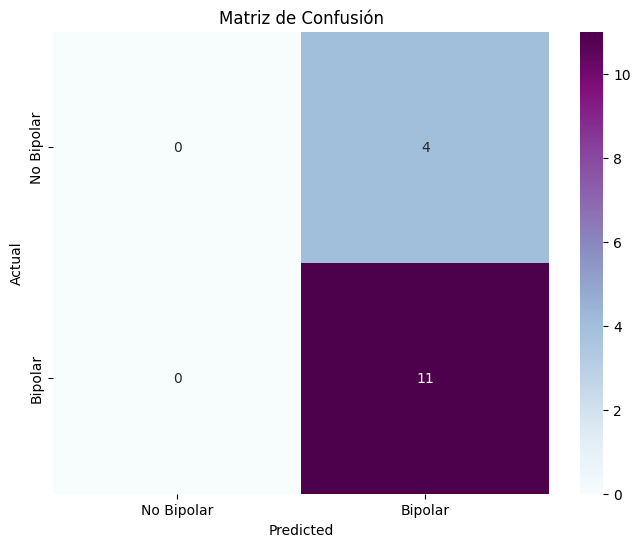

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener el modelo Random Forest de los ensambles homogéneos
ensambles, nombres = get_ensambles_homogeneos()
random_forest_model = ensambles[nombres.index('RF')]  # Obtener el modelo Random Forest

# Ajustar el modelo Random Forest a los datos de entrenamiento
random_forest_model.fit(X_train, y_train)

# Obtener predicciones del modelo Random Forest sobre los datos de prueba
y_pred = random_forest_model.predict(X_test)

# Cambiar el nombre de las clases
class_names = ['No Bipolar', 'Bipolar']

# Calcular matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Crear mapa de calor para la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="BuPu", xticklabels=class_names, yticklabels=class_names)
plt.title("Matriz de Confusión")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## Curva ROC

La curva ROC (Receiver Operating Characteristic) es una herramienta esencial para evaluar la capacidad de un modelo de clasificación y distinguir entre clases. Esta curva ilustra la relación entre la tasa de verdaderos positivos (sensibilidad) y la tasa de falsos positivos (especificidad).

La interpretación de la curva ROC se fundamenta en el área bajo la curva (AUC). Un valor de AUC de 1 indica un modelo perfecto, mientras que un valor de 0.5 sugiere un rendimiento similar al azar.

En nuestro caso específico, hemos obtenido un área bajo la curva de 0.95, lo cual señala que el modelo es altamente efectivo en la clasificación precisa de verdaderos positivos. Un AUC de 0.95 indica que el modelo es altamente efectivo para distinguir entre clases. Esto sugiere que el modelo tiene una alta capacidad para clasificar correctamente los verdaderos positivos y minimizar los falsos positivos.

Un AUC tan alto generalmente significa que el modelo tiene un buen equilibrio entre sensibilidad y especificidad, logrando un rendimiento robusto en la tarea de clasificación.

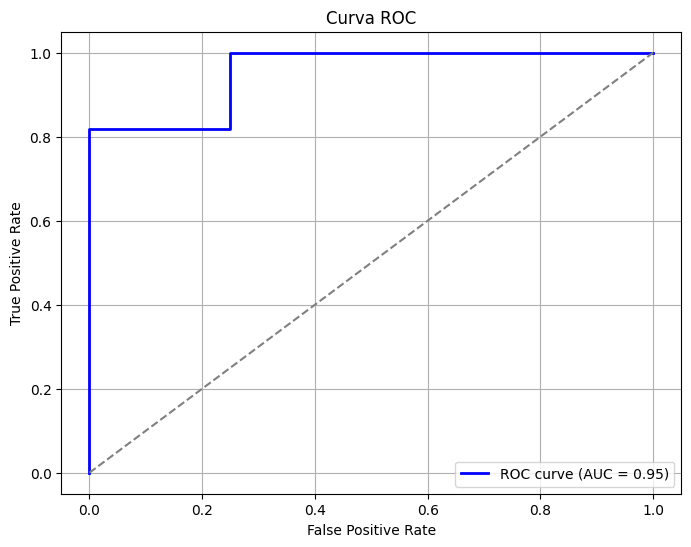

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Obtener el modelo Random Forest de los ensambles homogéneos
ensambles, nombres = get_ensambles_homogeneos()
random_forest_model = ensambles[nombres.index('RF')]  # Obtener el modelo Random Forest

# Ajustar el modelo Random Forest a los datos de entrenamiento
random_forest_model.fit(X_train, y_train)

# Calcular probabilidades de predicción
y_prob = random_forest_model.predict_proba(X_test)[:, 1]

# Calcular la tasa de verdaderos positivos y la tasa de falsos positivos
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calcular el área bajo la curva ROC
roc_auc = roc_auc_score(y_test, y_prob)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


## Curva de precisión

La curva de precisión-recall representa la relación entre la precisión y el recall para distintos umbrales de clasificación. El área bajo esta curva, conocida como (AP), es un indicador de la eficacia del modelo: cuanto más cercano a 1 sea su valor, mejor será el rendimiento.

En nuestro caso específico, hemos obtenido un valor AP de 0.94, lo cual indica que el modelo es altamente efectivo. Al obtener un AP de 0.94 podemos concluir que el modelo random forest es altamente efectivo, logrando un buen equilibrio entre precisión y recall. Es decir, el modelo puede identificar correctamente los verdaderos positivos mientras minimiza los falsos positivos y falsos negativos.

Un valor AP tan alto sugiere que el modelo tiene un rendimiento robusto, especialmente en situaciones donde es crucial manejar adecuadamente la clasificación de clases desbalanceadas.


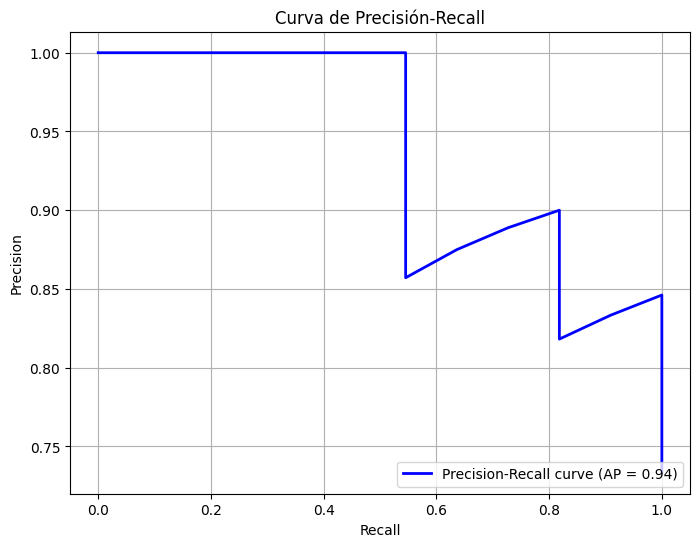

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Obtener el modelo Random Forest de los ensambles homogéneos
ensambles, nombres = get_ensambles_homogeneos()
random_forest_model = ensambles[nombres.index('RF')]  # Obtener el modelo Random Forest

# Ajustar el modelo Random Forest a los datos de entrenamiento
random_forest_model.fit(X_train, y_train)

# Calcular probabilidades de predicción
y_prob = random_forest_model.predict_proba(X_test)[:, 1]

# Calcular la precisión y el recall
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Calcular el área bajo la curva de precisión-recall
average_precision = average_precision_score(y_test, y_prob)

# Graficar la curva de precisión-recall
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (AP = %0.2f)' % average_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva de Precisión-Recall')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


## Curva de aprendizaje

La curva de aprendizaje ilustra el rendimiento del modelo tanto en el conjunto de entrenamiento como en el de validación, y cómo este evoluciona con el tamaño del conjunto de datos de entrenamiento. Esta herramienta nos permite determinar si el modelo se beneficiaría de una mayor cantidad de datos de entrenamiento.

Basándonos en los resultados obtenidos de nuestras curvas de aprendizaje, se observa que el modelo es altamente efectivo. Ambas curvas convergen entre sí, lo que indica que el modelo está aprendiendo de manera óptima tanto de los datos de entrenamiento como de los de validación, sin mostrar signos de sobreajuste.

Al realizar estas observaciones podemos sugerir que el modelo random forest es muy efectivo y se ajusta a los datos disponibles.
No mostrar signos de sobreajuste implica que el modelo tiene una buena capacidad de generalización, aprendiendo patrones relevantes sin memorizar el ruido de los datos de entrenamiento.

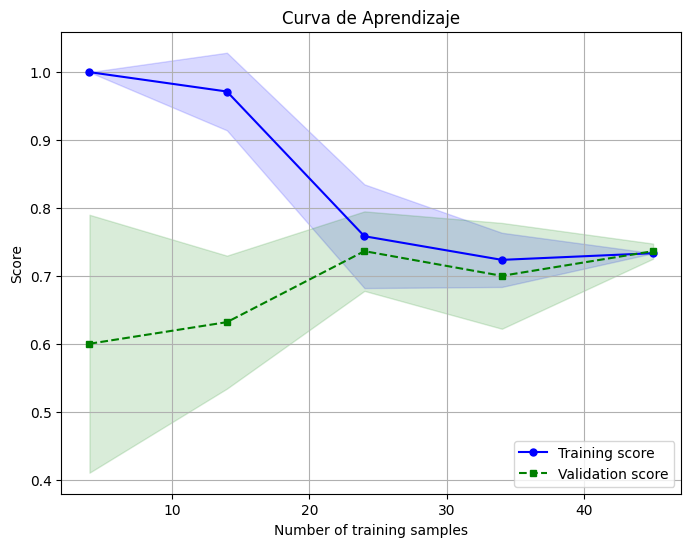

In [ ]:
from sklearn.model_selection import learning_curve

# Obtener el modelo Random Forest de los ensambles homogéneos
ensambles, nombres = get_ensambles_homogeneos()
random_forest_model = ensambles[nombres.index('RF')]  # Obtener el modelo Random Forest

# Calcular curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(random_forest_model, X_train, y_train, cv=5)

# Calcular medias y desviaciones estándar de los puntajes de entrenamiento y prueba
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Graficar curva de aprendizaje
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training score')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation score')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.xlabel('Number of training samples')
plt.ylabel('Score')
plt.title('Curva de Aprendizaje')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


## Diagrama de arbol

El gráfico de árbol nos ayuda a proporcionar una representación visual de cómo el modelo va tomando decisiones basadas en las caracteristicas de los datos.

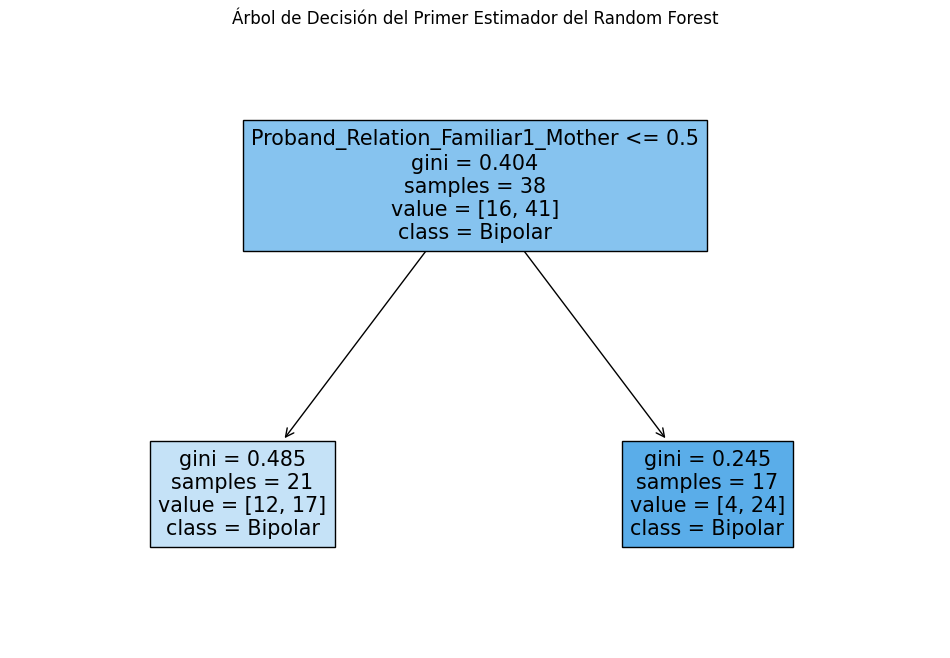

In [ ]:
from sklearn.tree import plot_tree

# Obtener el modelo Random Forest de los ensambles homogéneos
ensambles, nombres = get_ensambles_homogeneos()
random_forest_model = ensambles[nombres.index('RF')]  # Obtener el modelo Random Forest

# Entrenar el modelo Random Forest con todos los datos de entrenamiento
random_forest_model.fit(X_train, y_train)

# Plotear el árbol
plt.figure(figsize=(12, 8))
plot_tree(random_forest_model.estimators_[0], filled=True, feature_names=X_train.columns, class_names=['No Bipolar', 'Bipolar'])
plt.title("Árbol de Decisión del Primer Estimador del Random Forest")
plt.show()


## Gráfico importancia de características

Este gráfico de barras horizontales nos proporciona información sobre la importancia de las características al mostrarnos qué características tienen más peso en las decisiones tomadas por el modelo Random Forest.

En nuestra gráfica de importancia de características se destaca la influencia significativa de los factores familiares y genéticos, así como ciertos aspectos sociodemográficos como la educación y la edad, en la predicción del trastorno bipolar. Esta información nos es útil para entender mejor los factores de riesgo y para orientar futuras investigaciones o intervenciones.

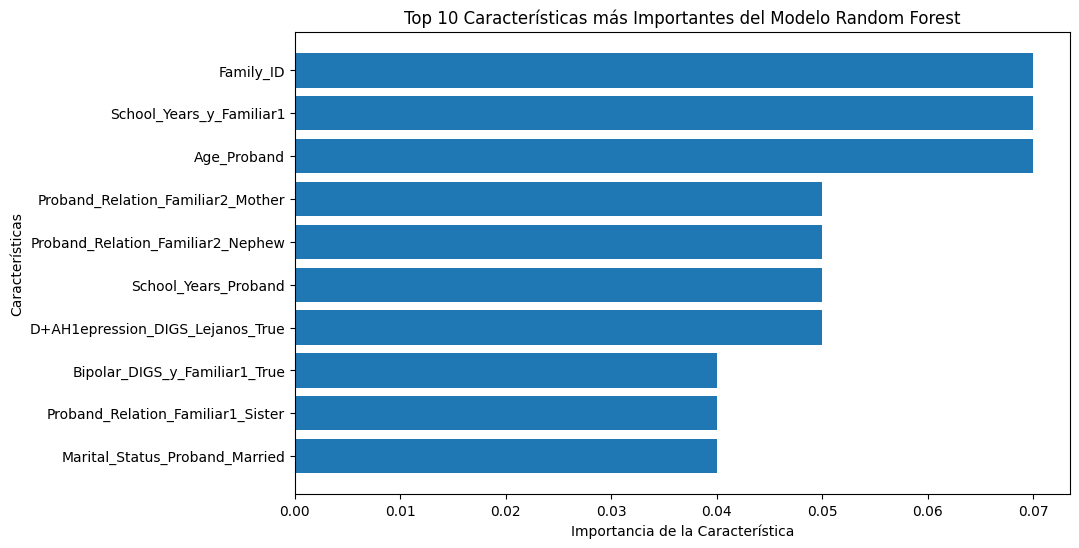

In [ ]:
# Obtener la importancia de las características del modelo Random Forest
feature_importance = random_forest_model.feature_importances_

# Ordenar las características por importancia
sorted_idx = np.argsort(feature_importance)

# Seleccionar las primeras n características más importantes para visualizar
n_features = 10  # Puedes ajustar este valor según tus necesidades
top_idx = sorted_idx[-n_features:]

# Crear un gráfico de barras horizontales para visualizar la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_idx)), feature_importance[top_idx], align='center')
plt.yticks(range(len(top_idx)), X_train.columns[top_idx])
plt.xlabel('Importancia de la Característica')
plt.ylabel('Características')
plt.title('Top {} Características más Importantes del Modelo Random Forest'.format(n_features))
plt.show()


### Conclusiones Avance 5

Basándonos en los análisis realizados de las gráficas y métricas anteriores, creemos que el modelo Random Forest se destaca como la mejor opción para nuestro proyecto debido a su excelente rendimiento en múltiples métricas clave que habíamos definido anteriormente, especialmente el recall, pero sin excluir su especificidad y precisión.

Al analizar la matriz de confusión, se muestra una alta sensibilidad, especialmente importante en contextos médicos, asegurando que los pacientes con trastorno bipolar sean correctamente identificados sin falsos negativos.

La curva ROC con un AUC de 0.95 y la curva de precisión-recall con un AP de 0.94 subrayan la alta efectividad del modelo en la clasificación precisa y equilibrada de los casos positivos. Además, las curvas de aprendizaje indican que el modelo generaliza bien sin signos de sobreajuste, demostrando su capacidad para aprender de manera óptima tanto de los datos de entrenamiento como de los de validación.

Finalmente, la importancia de las características revela que el modelo capta adecuadamente la influencia de factores genéticos y sociodemográficos, como la identificación familiar y el nivel educativo, lo que proporciona una comprensión profunda de los factores determinantes del trastorno bipolar. Estas evidencias combinadas justifican que el modelo Random Forest es una opción robusta y fiable para la tarea de predicción en nuestro proyecto.